Group Name: AG 40.

Student Name (Student ID):

1. TANAMATE FOO YONG QIN (A0237342J)

2. SURESH KUMAR SARAD (A0097808M)

3. LI TIANSHENG (A0243714J)

# Question 2

## Introduction to question 2

In the second question of this assignment, we will explore the use of local search in genome assembly.

We will use local search to assemble (construct) a large part of the nucleotide sequence of the monkeypox virus, which has been downloaded from the National Center for Biotechnology Information in the United States. Please note that no additional or specialized knowledge of biology or bioinformatics is required for this assignment. (Actechnical specifics of bioinformatics have been adapted and simplified for the purposes of this computer science assignment, so if you are a biologist, please do not apply preexisting knowledge to solve the problem. Furthermore, you should not attempt to search up the genome on genomic databases to "guess" the actual sequence, since we are more interested in your coding methodology rather than your attempts at reproducing a known sequence.)

This is an introductory computer science assignment and not a bioinformatics assignment; we are simply using bioinformatics as a use case to illustrate the applicability of local search to the natural sciences. Therefore, no knowledge of bioinformatics is assumed or required. In the paragraphs that follow, I will give a short crash course which will cover all the domain knowledge you will need to know in order to tackle this problem.  

For technical reasons, when we analyze the nucleotide sequence (genome) of a virus, we usually cannot “read” it in one fell swoop. We have to read the genome in parts, because the genome is usually too long for the machine to read in a single sitting. To simplify things, a “read” is a single view of part of the genome; think of it as a SUBSTRING, a partial view of the whole genome. After we have generated multiple reads of a genome, we then have to “stitch”, or combine, the different reads of the genome together. This process of stitching up reads of a genome into the final sequence is known as genome assembly. However, the different reads of the genome cannot just be concatenated like usual string concatenation. It’s not a situation where you have one read, “Hello”, and another read, “World”, and all you need to do is concatenate both strings together to make “Hello World”. Among other reasons, there are two major reasons why you can’t do so:

1. You do not know which read came first. The reads are not ordered. How do you know “Hello” came after “World”? The answer is that you don’t. Imagine how complicated this situation might be if you had more than two reads. (This is indeed our situation, where we have $n$ reads, and $n>>2$.)

2. One read may contain a substring contained in another read. Specifically, without loss of generality, part of the ending $x$ characters of a read (i.e., suffix) might also be found in the starting $x$ positions (i.e., prefix) of another read.

- A computer scientist usually creates opportunities from problems. While this may be a “problem” in that you just can’t concatenate two strings blindly, the fact that strings contain shared “substrings” is actually a very helpful clue that you can use to “join” strings together. 

- Note that the choice of the value of $x$ could be a hyperparameter decided by the computer scientist.

## Your tasks

In this part of the assignment, you will work with (simulated) reads that I have generated from the nucleotide sequence of the monkeypox virus. In reality, bioinformatics is far more complicated, but here we will work with a simplified situation. Your task is to examine the reads that I have provided for you, and from there “infer” the nucleotide sequence that might have produced those reads. 

The reads are provided in the csv file `data.csv` which simply provides a list of unique strings. Note that you should NOT assume any particular ordering of the strings in this dataframe. In fact, the strings have already been shuffled randomly. 

NOTE: You are not allowed to use `pandas` or any other libraries apart from the Python STL to load the csv file.

### Task A (3 marks): 

Create a directed graph. The nodes in the graph are the strings in the list of reads. An edge should be drawn FROM read A TO read B if and only if a suffix (of length $x$) of read A is also a prefix (obviously, also of length $x$) of read B. For the purposes of the assignment, limit the value of $x$ to between 5 and 30, both inclusive. That is, to be clear, $5\leq x\leq 30$. The weight of an edge between read A and read B should be the NEGATED value of $x$, i.e. $-x$. 

In your Jupyter notebook, please report the number of edges in your graph. Provide a barplot or histogram which shows the number of edges with different weights or weight categories. In this task, you are free to use plotting libraries such as `matplotlib` or `seaborn` to plot this graph.

As an example, if read A is "TACTAGT" and read B is "TAGTCCCCT", then an edge is drawn FROM read A TO read B (i.e., $A \rightarrow B$) with weight of $-4$. This is because the 4-suffix "TAGT" is also the 4-prefix of read B; in other words, the last 4 characters of read A (a substring of length 4) overlap with the first 4 characters of read B (a substring of length 4).

### Task B (7 marks): 

From Task A, you now have a graph which shows connections between reads based on how they overlap, in theory you could draw a path through the graph and thereby derive the full sequence (genome).

Task B asks you to use local search method(s) to determine a path through this directed graph of strings. 

- You are expected to use simulated annealing and tune the relevant configuration settings and hyperparameters. The minimum requirement is to implement simulated annealing.

- Explain tha rationale behind the choice of scheduling strategy and parameters.

- However, you may also explore other search methods in addition to simulated annealing. Marks will be awarded for effort.

Note the following constraints:

1. The path has to go through each and every vertex exactly once. For computer scientists, this constraint is reminiscent of the "Traveling Salesman's Problem", except that unlike TSP, we should not need to go back to the starting vertex again. 

2. For the purposes of neighbor generation / action selection at each node, bear in mind that a path through the graph which minimizes the total number of nucleotides in the assembled sequence is the preferred path. To state that another way, the assembled sequence should be derived from a path that goes through EACH and EVERY vertex exactly once, however we want this assembled sequence to be AS SHORT AS POSSIBLE.

3. You are not given the starting (source/origin) or ending (destination) vertex.

4. For avoidance of ambiguity, no cycles are allowed. You must not visit a vertex more than once.

5. You are not allowed to use any libraries apart from the Python Standard Library.
No import statements which import libraries outside of the Python STL should be found within your answer for Task B.

Please remember to report the assembled sequence that you obtain. Although it would be great if you can come up with a good sequence, please feel reassured that we are more interested in your APPROACH to the problem, and so you can potentially get a reasonable score on this task even if your solution is "wrong". It is the process, rather than the result, which matters more.

## Ingest data

In [273]:
# Problem Class
class Problem:
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When you create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)

In [274]:
# Use the following Node class to generate search tree
import math
class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost 

In [275]:
import random

# Code to generate neighbours, value of states, etc.
class TSP(Problem):
    def __init__(self, graph, csvpath, initial=None, goal=None, **kwds):
        super().__init__(initial, goal, **kwds)
        self.graph= graph
        self.csvpath= csvpath
        self.initial= self.generate_initial_state(self.graph)

    
    def generate_initial_state(self,graph_dictionary):
        # This function takes graph dictionary, and returns a complete tour with greedy selection
        initial_state=[]
    
        #start with read 0
        current_read= 0
        reached_read=[]

        initial_state.append(current_read)
        reached_read.append(current_read)

        while True:

            #create temp list with format [(224, -16),(302, -5)], where current read can go to read 224 with -16 weight, 302 with -5 weight, etc       
            temp_list=[]

            # Cycle through all connections to a read, and output in a temporary list
            for key in graph_dictionary:
                if key[0]== current_read:
                # cycle through all weights (if more than 1) between 1 edge 
                    for i in graph_dictionary[key]:
                        temp_list.append((key[1],i))


            #*****TRACING******
            #print(temp_list)


            # Out of all the edges, find the minimum edge in a greedy way for the initial stage. 
            min_weight=((0,10000))

            for element in temp_list:
                # Check if the next read is not already reached. 
                if element[0] not in reached_read:
                    if element[1]<min_weight[1]:
                        min_weight=((element[0],element[1]))

            # If a read has no other neighbour, go to the first unreached read with weight 0.
            if min_weight[0]==0 and min_weight[1]==10000:
                for i in range(0, number_of_reads):
                    if i not in reached_read:
                        min_weight=(i,0)
                        break

            #*****TRACING******        
            print(f"Read {current_read} goes to {min_weight[0]} with weight {min_weight[1]}")

            initial_state.append(min_weight[0])
            reached_read.append(min_weight[0])
            temp_list.clear()        

            # Check if we reached all elements, if yes, stop the loop. If no, continue loop
            if len(reached_read)==number_of_reads:
                break
            else:
                current_read=min_weight[0]

        print("")
        print("")
        print(f"The initial state is {initial_state}")
                
        return initial_state     


    def get_weight_between_two_reads(self,testing_tuple):
        # This function checks the graph for the weights between 2 reads, and takes the most negative
        if testing_tuple in self.graph.keys():
            setofweights= self.graph[testing_tuple]
            #There could be more than 1 edge between 2 reads, pick most negative
            return min(setofweights)
        else:
            #If there is no edge between 2 reads, assume weight is 0
            return 0
        
        
    
    def value_of_state(self,state):
        # This function takes a state- a complete tour eg [1,20,3,5,7,9,200...]
        # and returns the value of the entire tour, which is the sum of all the weights
        # This is done by checking the graph for the weights between 2 reads, and taking the most negative

        state=state[:]
        
        valuecounter=0 
        
        for i in range(len(state)):
            if i+1<len(state):
                testing_tuple=((state[i],state[i+1]))
                valuecounter+=self.get_weight_between_two_reads(testing_tuple)
        
        return valuecounter
            

        
        
    def generate_genome_sequence(self,state):
        # This function takes a state- a complete tour eg [1,20,3,5,7,9,200...]
        # and returns a) The complete stitched string, with overlaps merged
        # and b) The length of the completed stitched string
        state=state[:]
        
        temparray=[]
        genome_sequence=""
    
        with open(self.csvpath) as f:
            f.readline()
            counter=0
            for line in f:
                list_form=line.rstrip('\n').split(',')
                temparray.append([list_form[0]])
                temparray[counter].append(list_form[2])
                counter+=1
               
        for i in range(len(state)):
            if i+1<len(state):
                testing_tuple=((state[i],state[i+1]))

                weight=self.get_weight_between_two_reads(testing_tuple)

                if weight!=0:
                    genome_sequence+=temparray[state[i]][1][:weight]
                else:
                    genome_sequence+=temparray[state[i]][1]
                    
                
        return genome_sequence, len(genome_sequence)
    
    
    
    
    
    def generate_neighbour(self,state):
        # This function takes a state- a complete tour eg [1,20,3,5,7,9,200...]
        # It goes through the 2-Opt method
        # and returns a neighbouring state- another complete tour, eg [1,20,9,5,7,...]

        state=state[:]

        while True:
            #generate two random indices in the state list
            randomindex_1= random.randint(0, len(state)-2)
            randomindex_2= random.randint(0, len(state)-2)

            #generate two pairs
            pair1= (randomindex_1,randomindex_1+1)
            pair2= (randomindex_2,randomindex_2+1)

            #check pairs are not adjacent
            if pair1[1]==pair2[0] or pair1[0]==pair2[1] :                
                continue

            #check pairs are not identical
            elif pair1[0]==pair2[0]:
                continue            

                        
            #do a swap (i,j) and (k,l) becomes (i,k) and (j,l)
            else:
                i=state[pair1[0]]
                j=state[pair1[1]]
                k=state[pair2[0]]
                l=state[pair2[1]]

                
                state[pair1[1]]=k
                state[pair2[0]]=j
                break
        
        return state
    
    
    


# REPORT- TASK A:
A duplicate copy of this report (both Task A and Task B) is also found in the submitted PDF document. 

The team took a few steps to complete task A. We will outline our rationale, and thought process here.

### 1A: Generating the Graph:
- In the code segment below, in Step 1A. We have a function called "readcsvfile", which takes in the CSV file directory, and output the graph to a dictionary.

- The dictionary will have a format of {(0, 224): {-16}, (0, 302): {-5}, (1, 228): {-18}, (1, 344): {-6}, which represents Read 0 can go to Read 224, with a weight of -16, read 0 can go to Read 302 with a weight of -5, etc.

- The weights are generated by finding prefix/ suffix pairs from 5 to 30 characters and adding a negative to it. With this definition, the more negative a value is, the more overlap there is between the suffix/prefix of a read pair, and hence this is a more desirable solution.

- As the team noticed that there could be multiple weights between reads, the weights are stored in a set {}. For example, for (469, 105): {-6, -5}, (469, 254): {-7, -6, -5}, Read 469 can be joined to Read 105 with a weight of -6 and -5. While Read 469 can also be joined to Read 254 with -7, -6 and -5. There are 5 edges in this example.

- It is important for us to still store these weights in the graph for completeness. 






In [276]:
# STEP 1: GENERATE THE GRAPH AND INITIALISE THE PROBLEM 


# 1A: Function for taking in the CSV file, and output graph in dictionary 
            
csvpath='data.csv'

def readcsvfile(filename):
    temparray=[]
    outputgraph={}
    
    with open(filename) as f:
        f.readline()
        counter=0
        for line in f:
            list_form=line.rstrip('\n').split(',')
            temparray.append([list_form[0]])
            temparray[counter].append(list_form[2])
            counter+=1
    
    for i in range(len(temparray)):
        currentindex=temparray[i][0]
        currentreadsequence=temparray[i][1]
        
        for m in range(len(temparray)):
            if i==m:
                continue

            for k in range(5,31):
                testingreadsequence=temparray[m][1]

                if currentreadsequence[-k:]==testingreadsequence[0:k]:
                    if outputgraph.get((i,m),'error not found') != 'error not found':
                        outputgraph[(i,m)].add(-k)
                        
                    else:
                        outputgraph[(i,m)]={-k}

    return(outputgraph, counter)
    
graph_dictionary, number_of_reads= readcsvfile(csvpath)

print("STEP 1A: Graph Dictionary Below")
print("")
print(graph_dictionary)



    



STEP 1A: Graph Dictionary Below

{(0, 224): {-16}, (0, 302): {-5}, (1, 228): {-18}, (1, 344): {-6}, (1, 511): {-5}, (2, 223): {-22}, (3, 355): {-24}, (3, 548): {-5}, (4, 436): {-17}, (5, 102): {-5}, (5, 156): {-5}, (5, 185): {-15}, (6, 22): {-7}, (6, 433): {-12}, (6, 485): {-7}, (7, 231): {-25}, (8, 256): {-6}, (8, 590): {-23}, (9, 43): {-20}, (10, 24): {-18}, (10, 304): {-5}, (10, 584): {-5}, (11, 67): {-20}, (11, 473): {-5}, (12, 425): {-5}, (12, 552): {-11}, (13, 248): {-20}, (14, 66): {-6}, (14, 233): {-27}, (14, 456): {-9}, (14, 551): {-5}, (14, 591): {-5}, (15, 267): {-22}, (16, 117): {-30}, (17, 375): {-27}, (18, 105): {-5}, (18, 254): {-5}, (18, 323): {-5}, (18, 352): {-23}, (18, 416): {-5}, (18, 581): {-5}, (19, 250): {-13}, (19, 551): {-5}, (19, 591): {-5}, (20, 141): {-12}, (20, 166): {-5}, (20, 543): {-5}, (21, 19): {-24}, (21, 36): {-5}, (21, 317): {-5}, (21, 359): {-5}, (22, 49): {-5}, (22, 294): {-5}, (22, 361): {-5}, (22, 371): {-5}, (22, 428): {-22}, (22, 568): {-6}, (

# REPORT- TASK A (continued):


### 1B: Generating Insights from the Graph:
- In the code segment below, in Step 1b. We have a function called "generateinsights", which takes in the dictionary, and run some statistics on it.  

- From this, we can conclude that there are 1525 edges in the graph.

- A bar graph and a trace has been generated below to reflect this data (please scroll down) 



STEP 1B: Graph Insights
There are 1525 edges in the graph.


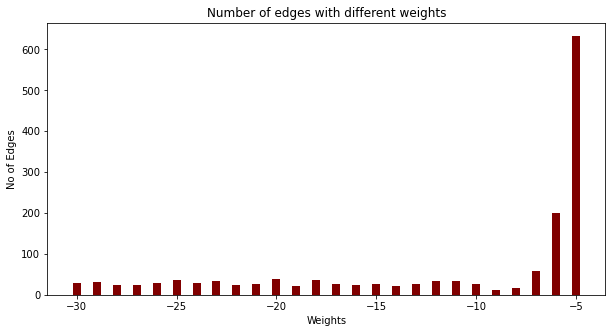

Weights: -30
Edges: 30
Weights: -29
Edges: 31
Weights: -28
Edges: 23
Weights: -27
Edges: 23
Weights: -26
Edges: 29
Weights: -25
Edges: 37
Weights: -24
Edges: 30
Weights: -23
Edges: 34
Weights: -22
Edges: 23
Weights: -21
Edges: 26
Weights: -20
Edges: 39
Weights: -19
Edges: 22
Weights: -18
Edges: 36
Weights: -17
Edges: 27
Weights: -16
Edges: 25
Weights: -15
Edges: 27
Weights: -14
Edges: 22
Weights: -13
Edges: 27
Weights: -12
Edges: 33
Weights: -11
Edges: 33
Weights: -10
Edges: 27
Weights: -9
Edges: 12
Weights: -8
Edges: 17
Weights: -7
Edges: 59
Weights: -6
Edges: 200
Weights: -5
Edges: 633


In [277]:
import numpy as np
import matplotlib.pyplot as plt

# 1B: Function for taking in the graph as a dictionary, and generating statistics.


def generateinsights(graph_dictionary):
    list_of_edges=[]
    
    for key in graph_dictionary:
        for weight in graph_dictionary[key]:
            list_of_edges.append(weight)
            
    print(f"There are {len(list_of_edges)} edges in the graph.")
    
    plotdictionary={}
    for element in list_of_edges:
        plotdictionary[element]=plotdictionary.get(element,0)+1
        
    weights = list(plotdictionary.keys())
    noofedges = list(plotdictionary.values())
    fig = plt.figure(figsize = (10, 5))
    plt.bar(weights, noofedges, color ='maroon', width = 0.4)
    plt.xlabel("Weights")
    plt.ylabel("No of Edges")
    plt.title("Number of edges with different weights")
    plt.show()
    
    for key in sorted(plotdictionary):
        print(f"Weights: {key}")
        
        print(f"Edges: {plotdictionary[key]}")
        
    
print("")
print("STEP 1B: Graph Insights")
generateinsights(graph_dictionary)

 


# REPORT- TASK B:

### 2A: Generating an Initial State:
- In the code segment below, in Step 2A. We initialise the TSP class, with an instance called tsp. 
- We pass both the graph_dictionary and csvpath to tsp.

- When the class is intialised, it automatically runs the "generate_initial_state" method to generate the initial state.

Rationale for Generating the Initial State:
- If we refer to the "generate_initial_state" method in the TSP class above, we are taking the following actions in a "greedy way".
- Since the objective is to have the greatest number of overlapping reads- hence resulting in the shortest final string, we have decided to start with a greedy approach, to constantly try to get the most negative weight at each step.
- We start at Read 0.
- For each read, we look through the dictionary to find a list of Reads that Read 0 is connected to with a negative weight.
- We aim to pick the most negative weight at each stage. For example, Read 0 is connect to read 224 with weight of -16, and read 302 with weight of -5. We pick -16, and go to Read 224. If one read is connected to another with more than 1 weight, we again pick the most negative.
- We also maintain a "Reached" list, given the problem specification that we should not go through a read more than once. If our next read has already been "Reached", we SKIP this, and proceed to the read with the next lowest weight.
- If one read cannot go to another read (eg, perhaps all has been reached), we will pick the first read (eg, from Read 0, Read 1, Read 2, etc), that has not been reached, and assume a connection to that read, with a weight of 0.
- At each stage, we check if the length of the Reach list is equal to the total number of Reads. If it is, we stop the process. This ensure we cover all the Reads, without duplication, and without going back to the first Read.


### 2B: Testing and Checking the Value of the Initial State:
- The initial state should be a complete tour. In Step 2B, we call a method called value_of_state, that gives us the Value of the State. 
- We assume the value of the state is the sum of all the weights, and hence a more negative value is a better state.
- Alternatively, we could have stitched the final string, and take the len of that string, but this would be the same outcome with unneccsary computational time. The sum of weights represents the number of overlapping characters, and we can select a better state from this.

Printout of the Initial State, and Value of the Initial State:
- From the printout below, we can see the value of the initial state is -11,910 (assume minimum weights are taken from Read to Read, or 0 if weights do not exist). 

### 2C: Stitching the Genome for the Initial State:
- In Step 2C, for completeness, we defined a method called "generate_genome_sequence" in the TSP class, which takes a state, and generate the stitched sequence, and the length of the stitched sequence.
- The length of the initial stitched sequence is 196,891
- The results are appended below. 



In [278]:
# 2A: Initialise the Problem TSP Class with the graph, and the path to the CSV (used for stitching at the end).
# Initial state is immediately generated by the generate_initial_state method in the TSP Class

tsp=TSP(graph_dictionary, csvpath)



# 2B: Test and check the value of initial state. 

value_of_state= tsp.value_of_state(tsp.initial)

print("")
print(f"The value of the initial state is {value_of_state}")
print(f"The length of the initial state (should be exactly 599) is {len(tsp.initial)}")



# 2C: Test and check the sequence created by the initial state. 

stitched_string, length_stitched= tsp.generate_genome_sequence(tsp.initial)
print("")
print("")
print("")
print(f"The length of the stitched genone of the initial state is {length_stitched}")
print("")
print(f"The stitched genome is")
print(stitched_string)


Read 0 goes to 224 with weight -16
Read 224 goes to 427 with weight -16
Read 427 goes to 258 with weight -25
Read 258 goes to 180 with weight -21
Read 180 goes to 89 with weight -30
Read 89 goes to 85 with weight -28
Read 85 goes to 432 with weight -25
Read 432 goes to 563 with weight -16
Read 563 goes to 96 with weight -24
Read 96 goes to 481 with weight -25
Read 481 goes to 557 with weight -10
Read 557 goes to 388 with weight -19
Read 388 goes to 593 with weight -12
Read 593 goes to 158 with weight -17
Read 158 goes to 212 with weight -12
Read 212 goes to 318 with weight -10
Read 318 goes to 54 with weight -14
Read 54 goes to 502 with weight -24
Read 502 goes to 50 with weight -19
Read 50 goes to 36 with weight -24
Read 36 goes to 306 with weight -25
Read 306 goes to 32 with weight -21
Read 32 goes to 582 with weight -18
Read 582 goes to 274 with weight -17
Read 274 goes to 499 with weight -11
Read 499 goes to 93 with weight -25
Read 93 goes to 461 with weight -28
Read 461 goes to 38

Read 457 goes to 596 with weight 0


The initial state is [0, 224, 427, 258, 180, 89, 85, 432, 563, 96, 481, 557, 388, 593, 158, 212, 318, 54, 502, 50, 36, 306, 32, 582, 274, 499, 93, 461, 382, 564, 171, 588, 510, 107, 147, 53, 63, 196, 219, 243, 18, 352, 191, 440, 584, 311, 264, 508, 29, 400, 540, 276, 495, 208, 41, 105, 443, 497, 287, 261, 312, 307, 295, 479, 203, 423, 534, 283, 452, 235, 179, 263, 374, 49, 459, 384, 237, 57, 214, 293, 506, 174, 346, 181, 305, 477, 242, 238, 597, 82, 51, 135, 328, 334, 484, 199, 354, 524, 511, 401, 412, 362, 577, 249, 299, 335, 69, 442, 120, 441, 232, 444, 535, 175, 225, 246, 288, 145, 411, 565, 516, 301, 159, 519, 462, 6, 433, 269, 525, 448, 561, 292, 198, 542, 155, 60, 79, 303, 415, 319, 184, 317, 247, 559, 474, 94, 116, 460, 488, 469, 398, 217, 61, 111, 491, 8, 590, 389, 536, 376, 509, 437, 533, 438, 70, 381, 591, 332, 397, 115, 205, 486, 95, 456, 323, 284, 148, 21, 19, 250, 134, 296, 285, 468, 226, 31, 377, 435, 364, 562, 182, 9, 43, 109, 151, 34

# REPORT- TASK B (continued):

### 2D: Simulated Annealing:
- Portions of the Simulated Annealing and Exp Schedule code is modified from the AIMA repository, with credits to the authors or content creators.
- From the initial state, we will go through a Simulated Annealing Algorithm. This is important to ensure that our initial state is not at a local maximum, and hence we want to encourage exploration of "bad neighbours", or neighbours with HIGHER overall values. Eg, a value of -5000 is higher than -10000. This means that there are less overlapping characters, resulting in a longer final genome sequence, and hence is a worse state.

### Generating Neighbours with 2Opt
- While in the Simulated Annealing Algorithm, we will generate neighbours. There is a method in the TSP class called "generate_neighbour", which takes in a state, and performs a 2Opt procedure, and returns a neighbouring state.
- Firstly, we will generate 2 random numbers, from 0 to len(state)-2.
- Next, we will add 1 to each random number to generate 2 pairs.
- For example, if our first random number is 0, and second random number is 600, our pair is (0,1) and (600,601). These pairs represents the INDICES of our state (which is a list).
- We check that the pairs are not adjacent, and are also not identical. If they are, we generate a new pair.
- We then swap the VALUES of the pairs, so that the values of (i,j) and (k,l) becomes (i,k) and (j,l). 
- The generate_neighbour class will then return this new state.


### Selecting a Temperature and Schedule
- We are guided by the philiosophy that at the beginning of the simulated annealing algorithm, we want the probability P to be large, so we accept neighbours with worst values to explore the solution space. This should reduce gradually when the temperature reduces.


a) Initial Temperature:
- Since we are using the 2-Opt procedure, this means that the position of 2 Reads will be swapped. When this happens, up to 4 sets of weights will be impacted.
- For example, if we take the scenario, A-> B-> C-> D -> E ->F, and do a 2-Opt with (B,C) and (E,F), our new state will be A-> B-> E-> D -> C ->F.
- In this scenario, B going to E is new. E going to D is also new. D going to C is new, C going to F is new. 
- Since the maximum negative weight is -30, it means that our maximum change could be approximated as -30*4 = -120
- Hence, we set a large value of T, such that e^(-120/T) is as close to 1 at the start, without T being overly excessive. 
- Hence, we derive T to be 10000.


b) Lambda:
- When looking at our initial state, we suspected that our intial value was rather good. With an initial value of -11,910, and 599 reads, it would mean that reach read is going to another with an average of -20 in weight value. 
- Looking at the bar graph, this would mean that our initial greedy solution avoided many reads of -5, and instead prefer the better, more negative values.
- We iterated on a few values of Lamda, compared the output, and decided that we would prefer a higher value of 0.1 (vs 0.01 or 0.001 seen in the examples). 
- This drops the temperature quickly initially to avoid accepting too many "worse" neighbours, while still exploring the solution space, and has a long tail of lower temperatures to iterate through "better" neighbours and be more discerning.   


### Running the Simulated Annealing Algorithmn
- We create a Node from the initial state.
- If the Temperature is 0, the algorithm ends and returns the current state.
- Else, we generate delta e, which is the negative of the difference of the neighbour state and the current state.
- If delta e>0 (better state, with a more negative value), we create a node with the neighbour state, and make this our current state.
- If not, we accept the neighbour state if r<=p:
            r= random.uniform(0, 1)
            p= math.exp(delta_e / T)
- Our trace shows that the value of the current state drops initially as it explores other states with other values, and then starts climbing again as our algorithm gets more selective. 


### Analysis of the Results (this is in the next code block)
- The value of the final state is -9016, while the length of the stitched genome is 199,804. (this may differ slightly when you run the code again since 2Opt is using random numbers, but the final result should not be too far)
- If we recall, our initial state's value is -11,910, and the length of the stitched genome for the initial state is 196,891. 
- The result of the simulated annealing algorithm is worse than the initial state, which significantly confused the team.

To troubleshoot this, the team iterated through the following scenarios:
- Starting with a random initial state (random list of reads from 0 to 598), and running the simulated annealing algorithm 
- Modifying the Lambda (both increasing and decreasing), Temperatures (both increasing and decreasing) or Number of Iterations (increasingly this significantly) 
- Modifying the 2-Opt procedure to only swap to weights with negative values.

In no scenario were we able to find a better state than our initial state. 
- We hypothesize that when we do the 2-Opt method, there is a very high chance of moving to a significantly worse state, given that many edges have weights which are close to 0 (eg -5). Also, when we swap pairs, reads that are not connected will assume a weight of 0. 
- This is different from the traveling salesman problem, where swapping pairs could see losses in one pair, and also very likely gains with another pair.
- This means that when we accept "worse neighbours", we see a drop in value quite quickly, if we start from a greedy initial state.
- Once we start being more discerning to accept "good neighbours" more, this hits local maximums much more readily, and it would be very, very hard to get higher values, even with more iterations.


Hence, we accept our initial state as the final solution to the problem. 


In [279]:
# 2D: Simulated Annealing. 

# Simulated Annealing and Exp Schedule is modified from the AIMA repository, with credits to the authors or content creators.

import random


def exp_schedule(k=10000, lam=0.1, limit=100000):
    """One possible schedule function for simulated annealing"""
    return lambda t: (k * math.exp(-lam * t) if t < limit else 0)


def simulated_annealing(tsp, schedule=exp_schedule()):
    current = Node(tsp.initial)
    for t in range(10000000):
        T = schedule(t)
        #*****TRACING******        
        print("")
        print("Temperature", T)
        
        if T == 0:
            return current

        # Generate a neighbour state using 2Opt- call the generate_neighbour method in the tsp instance
        neighbor = tsp.generate_neighbour(current.state)

        #*****TRACING******                
        #print("current state", current.state)
        #print("neighbour state", neighbor)
        
        # Get delta_e, NEGATIVE (value of the neighbor state, minus value of state of current node)     
        delta_e = -(tsp.value_of_state(neighbor) - tsp.value_of_state(current.state))
        
        
        #*****TRACING******                
        print("Value of neighbour state", tsp.value_of_state(neighbor))
        print("Value of current state", tsp.value_of_state(current.state))

        
        # If next value is more than current value, generate neighbour node and set as current
        if delta_e > 0:
            next_choice=Node(neighbor)
            current = next_choice
        
        else: 
            r= random.uniform(0, 1)
            p= math.exp(delta_e / T)
              
            #*****TRACING******                
            print("Printing r", r)
            print("Printing p", p)
            print("Delta e", delta_e)

            if r<=p:
                next_choice=Node(neighbor)
                current = next_choice
                print("Accepted worse neighbour")

    


winning_node=simulated_annealing(tsp)




Temperature 10000.0
Value of neighbour state -11845
Value of current state -11910
Printing r 0.740802140645287
Printing p 0.9935210793034477
Delta e -65
Accepted worse neighbour

Temperature 9048.374180359595
Value of neighbour state -11777
Value of current state -11845
Printing r 0.0329310567830553
Printing p 0.9925130059817593
Delta e -68
Accepted worse neighbour

Temperature 8187.307530779818
Value of neighbour state -11696
Value of current state -11777
Printing r 0.06463351729782463
Printing p 0.9901554159750566
Delta e -81
Accepted worse neighbour

Temperature 7408.182206817179
Value of neighbour state -11613
Value of current state -11696
Printing r 0.9713073287874352
Printing p 0.9888587010394128
Delta e -83
Accepted worse neighbour

Temperature 6703.200460356394
Value of neighbour state -11548
Value of current state -11613
Printing r 0.7150493737309126
Printing p 0.9903500024206092
Delta e -65
Accepted worse neighbour

Temperature 6065.306597126334
Value of neighbour state -114

Value of neighbour state -9159
Value of current state -9230
Printing r 0.7801384902324181
Printing p 0.4220109723802745
Delta e -71

Temperature 74.46583070924338
Value of neighbour state -9177
Value of current state -9230
Printing r 0.3478239404670652
Printing p 0.4907915258296696
Delta e -53
Accepted worse neighbour

Temperature 67.37946999085467
Value of neighbour state -9158
Value of current state -9177
Printing r 0.13428277259693644
Printing p 0.7542849969922079
Delta e -19
Accepted worse neighbour

Temperature 60.967465655156325
Value of neighbour state -9058
Value of current state -9158
Printing r 0.08327048803970027
Printing p 0.19393755115577765
Delta e -100
Accepted worse neighbour

Temperature 55.16564420760771
Value of neighbour state -8991
Value of current state -9058
Printing r 0.26372169387199973
Printing p 0.2968512757755622
Delta e -67
Accepted worse neighbour

Temperature 49.91593906910212
Value of neighbour state -8954
Value of current state -8991
Printing r 0.115703

Value of neighbour state -8847
Value of current state -8890
Printing r 0.07322943116668634
Printing p 2.1017912810907515e-34
Delta e -43

Temperature 0.5017468205617528
Value of neighbour state -8836
Value of current state -8890
Printing r 0.3420882678923437
Printing p 1.817567382973257e-47
Delta e -54

Temperature 0.45399929762484853
Value of neighbour state -8842
Value of current state -8890
Printing r 0.8446364185396378
Printing p 1.2115232626945003e-46
Delta e -48

Temperature 0.4107955522530065
Value of neighbour state -8815
Value of current state -8890
Printing r 0.6177897210844124
Printing p 5.125544465028744e-80
Delta e -75

Temperature 0.3717031868412667
Value of neighbour state -8788
Value of current state -8890
Printing r 0.8714259020920602
Printing p 6.670622617012973e-120
Delta e -102

Temperature 0.3363309518571897
Value of neighbour state -8878
Value of current state -8890
Printing r 0.9513219666134851
Printing p 3.1970191640177383e-16
Delta e -12

Temperature 0.30432483

Temperature 0.00016831730696737537
Value of neighbour state -8838
Value of current state -8890
Printing r 0.9468463689778992
Printing p 0.0
Delta e -52

Temperature 0.0001522997974471263
Value of neighbour state -8840
Value of current state -8890
Printing r 0.4066157246401103
Printing p 0.0
Delta e -50

Temperature 0.0001378065554894572
Value of neighbour state -8799
Value of current state -8890
Printing r 0.6202116225297089
Printing p 0.0
Delta e -91

Temperature 0.00012469252785750988
Value of neighbour state -8818
Value of current state -8890
Printing r 0.671969039584203
Printing p 0.0
Delta e -72

Temperature 0.00011282646495496604
Value of neighbour state -8840
Value of current state -8890
Printing r 0.9342404670203751
Printing p 0.0
Delta e -50

Temperature 0.00010208960723597601
Value of neighbour state -8832
Value of current state -8890
Printing r 0.4700678773064557
Printing p 0.0
Delta e -58

Temperature 9.237449661970594e-05
Value of neighbour state -8827
Value of current sta

Value of neighbour state -8879
Value of current state -8890
Printing r 0.8489845165357366
Printing p 0.0
Delta e -11

Temperature 3.4158829937838524e-07
Value of neighbour state -8870
Value of current state -8890
Printing r 0.7753002946719452
Printing p 0.0
Delta e -20

Temperature 3.0908187484083206e-07
Value of neighbour state -8841
Value of current state -8890
Printing r 0.677035115969148
Printing p 0.0
Delta e -49

Temperature 2.7966884559269273e-07
Value of neighbour state -8798
Value of current state -8890
Printing r 0.981064390744424
Printing p 0.0
Delta e -92

Temperature 2.5305483615118916e-07
Value of neighbour state -8862
Value of current state -8890
Printing r 0.9507465850488142
Printing p 0.0
Delta e -28

Temperature 2.289734845645553e-07
Value of neighbour state -8858
Value of current state -8890
Printing r 0.822478334081906
Printing p 0.0
Delta e -32

Temperature 2.0718377657208856e-07
Value of neighbour state -8808
Value of current state -8890
Printing r 0.5575519073114

Value of neighbour state -8833
Value of current state -8890
Printing r 0.16833383959658066
Printing p 0.0
Delta e -57

Temperature 9.381844588498617e-11
Value of neighbour state -8816
Value of current state -8890
Printing r 0.5446057595605915
Printing p 0.0
Delta e -74

Temperature 8.489044033871777e-11
Value of neighbour state -8796
Value of current state -8890
Printing r 0.5088409973036326
Printing p 0.0
Delta e -94

Temperature 7.681204685202096e-11
Value of neighbour state -8827
Value of current state -8890
Printing r 0.8719727249520658
Printing p 0.0
Delta e -63

Temperature 6.95024141476397e-11
Value of neighbour state -8830
Value of current state -8890
Printing r 0.621011060566324
Printing p 0.0
Delta e -60

Temperature 6.288838496461615e-11
Value of neighbour state -8861
Value of current state -8890
Printing r 0.8635477360687125
Printing p 0.0
Delta e -29

Temperature 5.6903763875834665e-11
Value of neighbour state -8825
Value of current state -8890
Printing r 0.266938630805210

Value of current state -8890
Printing r 0.6590130103616578
Printing p 0.0
Delta e -73

Temperature 1.4141542848922569e-14
Value of neighbour state -8890
Value of current state -8890
Printing r 0.16809411503050575
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 1.2795797118463969e-14
Value of neighbour state -8861
Value of current state -8890
Printing r 0.5729492785041987
Printing p 0.0
Delta e -29

Temperature 1.1578116026382891e-14
Value of neighbour state -8875
Value of current state -8890
Printing r 0.39918781124222913
Printing p 0.0
Delta e -15

Temperature 1.0476312611033043e-14
Value of neighbour state -8859
Value of current state -8890
Printing r 0.7879139813908616
Printing p 0.0
Delta e -31

Temperature 9.479359653504757e-15
Value of neighbour state -8823
Value of current state -8890
Printing r 0.27117281917841296
Printing p 0.0
Delta e -67

Temperature 8.577279313511479e-15
Value of neighbour state -8828
Value of current state -8890
Printing r 0.9699533230513285

Value of current state -8890
Printing r 0.35658465726372357
Printing p 0.0
Delta e -38

Temperature 2.869928030209224e-17
Value of neighbour state -8858
Value of current state -8890
Printing r 0.4745670257624971
Printing p 0.0
Delta e -32

Temperature 2.596818268803538e-17
Value of neighbour state -8826
Value of current state -8890
Printing r 0.4907765151557799
Printing p 0.0
Delta e -64

Temperature 2.349698337452817e-17
Value of neighbour state -8816
Value of current state -8890
Printing r 0.4635210611609475
Printing p 0.0
Delta e -74

Temperature 2.1260949768241908e-17
Value of neighbour state -8837
Value of current state -8890
Printing r 0.3660430005032459
Printing p 0.0
Delta e -53

Temperature 1.9237702893288213e-17
Value of neighbour state -8864
Value of current state -8890
Printing r 0.7168681406661076
Printing p 0.0
Delta e -26

Temperature 1.7406993414905792e-17
Value of neighbour state -8890
Value of current state -8890
Printing r 0.661608167495241
Printing p 1.0
Delta e 0
A

Value of neighbour state -8827
Value of current state -8890
Printing r 0.6332473948364734
Printing p 0.0
Delta e -63

Temperature 2.892271651262754e-20
Value of neighbour state -8863
Value of current state -8890
Printing r 0.7760383511214647
Printing p 0.0
Delta e -27

Temperature 2.6170356131871884e-20
Value of neighbour state -8799
Value of current state -8890
Printing r 0.352187960862695
Printing p 0.0
Delta e -91

Temperature 2.3679917471444463e-20
Value of neighbour state -8821
Value of current state -8890
Printing r 0.020158941629154548
Printing p 0.0
Delta e -69

Temperature 2.142647538416654e-20
Value of neighbour state -8831
Value of current state -8890
Printing r 0.370115311171643
Printing p 0.0
Delta e -59

Temperature 1.9387476664220267e-20
Value of neighbour state -8841
Value of current state -8890
Printing r 0.8189821827190927
Printing p 0.0
Delta e -49

Temperature 1.754251432708546e-20
Value of neighbour state -8827
Value of current state -8890
Printing r 0.219729483229

Value of neighbour state -8813
Value of current state -8890
Printing r 0.052242855570913904
Printing p 0.0
Delta e -77

Temperature 6.48698272260112e-23
Value of neighbour state -8838
Value of current state -8890
Printing r 0.5618864235987461
Printing p 0.0
Delta e -52

Temperature 5.86966469756227e-23
Value of neighbour state -8815
Value of current state -8890
Printing r 0.06596178974774114
Printing p 0.0
Delta e -75

Temperature 5.311092249679095e-23
Value of neighbour state -8828
Value of current state -8890
Printing r 0.20783150103449743
Printing p 0.0
Delta e -62

Temperature 4.8056749981504215e-23
Value of neighbour state -8809
Value of current state -8890
Printing r 0.575343368578501
Printing p 0.0
Delta e -81

Temperature 4.3483545572463865e-23
Value of neighbour state -8805
Value of current state -8890
Printing r 0.7859381008412315
Printing p 0.0
Delta e -85

Temperature 3.9345539102837123e-23
Value of neighbour state -8866
Value of current state -8890
Printing r 0.72540088885

Value of neighbour state -8866
Value of current state -8890
Printing r 0.6056286272666457
Printing p 0.0
Delta e -24

Temperature 6.537486666326857e-26
Value of neighbour state -8810
Value of current state -8890
Printing r 0.19592147325629816
Printing p 0.0
Delta e -80

Temperature 5.915362555603739e-26
Value of neighbour state -8825
Value of current state -8890
Printing r 0.7967139362452387
Printing p 0.0
Delta e -65

Temperature 5.352441381559037e-26
Value of neighbour state -8848
Value of current state -8890
Printing r 0.5961808695978038
Printing p 0.0
Delta e -42

Temperature 4.843089239878731e-26
Value of neighbour state -8845
Value of current state -8890
Printing r 0.40248728975384274
Printing p 0.0
Delta e -45

Temperature 4.382208363129571e-26
Value of neighbour state -8836
Value of current state -8890
Printing r 0.00018759238685273072
Printing p 0.0
Delta e -54

Temperature 3.9651861005897724e-26
Value of neighbour state -8817
Value of current state -8890
Printing r 0.98331420

Value of neighbour state -8805
Value of current state -8890
Printing r 0.7676438728389379
Printing p 0.0
Delta e -85

Temperature 6.588383804923091e-29
Value of neighbour state -8862
Value of current state -8890
Printing r 0.607220522815322
Printing p 0.0
Delta e -28

Temperature 5.961416191076575e-29
Value of neighbour state -8818
Value of current state -8890
Printing r 0.21464733962333027
Printing p 0.0
Delta e -72

Temperature 5.394112434171523e-29
Value of neighbour state -8853
Value of current state -8890
Printing r 0.09936172595578352
Printing p 0.0
Delta e -37

Temperature 4.880794767531385e-29
Value of neighbour state -8847
Value of current state -8890
Printing r 0.17734719171350588
Printing p 0.0
Delta e -43

Temperature 4.416325735416545e-29
Value of neighbour state -8841
Value of current state -8890
Printing r 0.4867006524828368
Printing p 0.0
Delta e -49

Temperature 3.996056775640032e-29
Value of neighbour state -8862
Value of current state -8890
Printing r 0.4953680629749

Value of neighbour state -8800
Value of current state -8890
Printing r 0.7977453510101933
Printing p 0.0
Delta e -90

Temperature 2.9756968735933827e-31
Value of neighbour state -8850
Value of current state -8890
Printing r 0.41564463973787635
Printing p 0.0
Delta e -40

Temperature 2.692521875959891e-31
Value of neighbour state -8852
Value of current state -8890
Printing r 0.3851893390148432
Printing p 0.0
Delta e -38

Temperature 2.4362945422488994e-31
Value of neighbour state -8799
Value of current state -8890
Printing r 0.9780997037828046
Printing p 0.0
Delta e -91

Temperature 2.2044504631835754e-31
Value of neighbour state -8811
Value of current state -8890
Printing r 0.4043736968716918
Printing p 0.0
Delta e -79

Temperature 1.994669265295213e-31
Value of neighbour state -8890
Value of current state -8890
Printing r 0.6224096059649779
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 1.8048513878454152e-31
Value of neighbour state -8824
Value of current state -8890


Value of neighbour state -8865
Value of current state -8890
Printing r 0.7745770464059403
Printing p 0.0
Delta e -25

Temperature 2.455262140548838e-34
Value of neighbour state -8847
Value of current state -8890
Printing r 0.8367510726286057
Printing p 0.0
Delta e -43

Temperature 2.221613055855667e-34
Value of neighbour state -8795
Value of current state -8890
Printing r 0.05259889591471012
Printing p 0.0
Delta e -95

Temperature 2.0101986213354024e-34
Value of neighbour state -8855
Value of current state -8890
Printing r 0.4615523993817554
Printing p 0.0
Delta e -35

Temperature 1.8189029302685815e-34
Value of neighbour state -8800
Value of current state -8890
Printing r 0.7336445923795174
Printing p 0.0
Delta e -90

Temperature 1.6458114310822736e-34
Value of neighbour state -8839
Value of current state -8890
Printing r 0.17837780960606597
Printing p 0.0
Delta e -51

Temperature 1.4891917658745395e-34
Value of neighbour state -8823
Value of current state -8890
Printing r 0.825474696

Value of neighbour state -8823
Value of current state -8890
Printing r 0.3520907233457752
Printing p 0.0
Delta e -67

Temperature 9.079224783989815e-37
Value of neighbour state -8848
Value of current state -8890
Printing r 0.0518817254174907
Printing p 0.0
Delta e -42

Temperature 8.215222311313367e-37
Value of neighbour state -8851
Value of current state -8890
Printing r 0.9328750966758153
Printing p 0.0
Delta e -39

Temperature 7.433440544760237e-37
Value of neighbour state -8840
Value of current state -8890
Printing r 0.8991491227142797
Printing p 0.0
Delta e -50

Temperature 6.7260551496447084e-37
Value of neighbour state -8796
Value of current state -8890
Printing r 0.553086303771539
Printing p 0.0
Delta e -94

Temperature 6.085986375171935e-37
Value of neighbour state -8853
Value of current state -8890
Printing r 0.7446475594645549
Printing p 0.0
Delta e -37

Temperature 5.506828197912634e-37
Value of neighbour state -8815
Value of current state -8890
Printing r 0.830234012142700

Value of neighbour state -8860
Value of current state -8890
Printing r 0.4072123466118758
Printing p 0.0
Delta e -30

Temperature 3.710471653060466e-39
Value of neighbour state -8795
Value of current state -8890
Printing r 0.20198698727901865
Printing p 0.0
Delta e -95

Temperature 3.357373590250823e-39
Value of neighbour state -8853
Value of current state -8890
Printing r 0.0035458875126040956
Printing p 0.0
Delta e -37

Temperature 3.037877250784691e-39
Value of neighbour state -8803
Value of current state -8890
Printing r 0.2520445281641682
Printing p 0.0
Delta e -87

Temperature 2.7487850079102147e-39
Value of neighbour state -8822
Value of current state -8890
Printing r 0.05061894327587857
Printing p 0.0
Delta e -68

Temperature 2.4872035292934123e-39
Value of neighbour state -8868
Value of current state -8890
Printing r 0.8494302993158276
Printing p 0.0
Delta e -22

Temperature 2.2505148195757903e-39
Value of neighbour state -8826
Value of current state -8890
Printing r 0.7418616

Value of neighbour state -8855
Value of current state -8890
Printing r 0.3869634958082594
Printing p 0.0
Delta e -35

Temperature 4.567263722284663e-42
Value of neighbour state -8854
Value of current state -8890
Printing r 0.10609551507540693
Printing p 0.0
Delta e -36

Temperature 4.132631113961384e-42
Value of neighbour state -8809
Value of current state -8890
Printing r 0.7268340390547576
Printing p 0.0
Delta e -81

Temperature 3.739359266851858e-42
Value of neighbour state -8859
Value of current state -8890
Printing r 0.9154282194378806
Printing p 0.0
Delta e -31

Temperature 3.383512184127093e-42
Value of neighbour state -8833
Value of current state -8890
Printing r 0.025189924226222793
Printing p 0.0
Delta e -57

Temperature 3.061528428578743e-42
Value of neighbour state -8790
Value of current state -8890
Printing r 0.8697579184615369
Printing p 0.0
Delta e -100

Temperature 2.7701854785588943e-42
Value of neighbour state -8828
Value of current state -8890
Printing r 0.7737412905

Value of neighbour state -8856
Value of current state -8890
Printing r 0.11675450483496608
Printing p 0.0
Delta e -34

Temperature 3.0853637409394676e-45
Value of neighbour state -8809
Value of current state -8890
Printing r 0.431843176265144
Printing p 0.0
Delta e -81

Temperature 2.7917525610534137e-45
Value of neighbour state -8787
Value of current state -8890
Printing r 0.3747867407328461
Printing p 0.0
Delta e -103

Temperature 2.5260821791388628e-45
Value of neighbour state -8837
Value of current state -8890
Printing r 0.7419375259716485
Printing p 0.0
Delta e -53

Temperature 2.2856936767186717e-45
Value of neighbour state -8853
Value of current state -8890
Printing r 0.6206219753412409
Printing p 0.0
Delta e -37

Temperature 2.0681811648632246e-45
Value of neighbour state -8833
Value of current state -8890
Printing r 0.34652260972418103
Printing p 0.0
Delta e -57

Temperature 1.871367705245454e-45
Value of neighbour state -8840
Value of current state -8890
Printing r 0.91014793

Value of current state -8890
Printing r 0.3397682158202754
Printing p 0.0
Delta e -40

Temperature 8.452183714132371e-48
Value of neighbour state -8831
Value of current state -8890
Printing r 0.5126223173205887
Printing p 0.0
Delta e -59

Temperature 7.647852088661164e-48
Value of neighbour state -8822
Value of current state -8890
Printing r 0.5018634731772823
Printing p 0.0
Delta e -68

Temperature 6.920062737425029e-48
Value of neighbour state -8858
Value of current state -8890
Printing r 0.3016286808762273
Printing p 0.0
Delta e -32

Temperature 6.261531699978553e-48
Value of neighbour state -8828
Value of current state -8890
Printing r 0.03874766013829578
Printing p 0.0
Delta e -62

Temperature 5.665668176358939e-48
Value of neighbour state -8815
Value of current state -8890
Printing r 0.7509563274853485
Printing p 0.0
Delta e -75

Temperature 5.126508564145083e-48
Value of neighbour state -8840
Value of current state -8890
Printing r 0.390570099672774
Printing p 0.0
Delta e -50

T

Value of neighbour state -8813
Value of current state -8890
Printing r 0.7932795548822764
Printing p 0.0
Delta e -77

Temperature 7.707393898470897e-51
Value of neighbour state -8801
Value of current state -8890
Printing r 0.5082094335953627
Printing p 0.0
Delta e -89

Temperature 6.973938394878555e-51
Value of neighbour state -8846
Value of current state -8890
Printing r 0.647388406034677
Printing p 0.0
Delta e -44

Temperature 6.310280410763701e-51
Value of neighbour state -8838
Value of current state -8890
Printing r 0.4191126029668787
Printing p 0.0
Delta e -52

Temperature 5.709777833958355e-51
Value of neighbour state -8806
Value of current state -8890
Printing r 0.7379043978668054
Printing p 0.0
Delta e -84

Temperature 5.166420632837861e-51
Value of neighbour state -8825
Value of current state -8890
Printing r 0.5820567327818196
Printing p 0.0
Delta e -65

Temperature 4.674770705904679e-51
Value of neighbour state -8847
Value of current state -8890
Printing r 0.4078588086944069

Value of neighbour state -8802
Value of current state -8890
Printing r 0.17361302091914832
Printing p 0.0
Delta e -88

Temperature 1.7286664976242062e-53
Value of neighbour state -8841
Value of current state -8890
Printing r 0.08175668388044044
Printing p 0.0
Delta e -49

Temperature 1.5641621303555607e-53
Value of neighbour state -8842
Value of current state -8890
Printing r 0.017402457544992256
Printing p 0.0
Delta e -48

Temperature 1.41531242342056e-53
Value of neighbour state -8826
Value of current state -8890
Printing r 0.04211256071685665
Printing p 0.0
Delta e -64

Temperature 1.2806276389220833e-53
Value of neighbour state -8827
Value of current state -8890
Printing r 0.05014823870725105
Printing p 0.0
Delta e -63

Temperature 1.1587598062677515e-53
Value of neighbour state -8852
Value of current state -8890
Printing r 0.4457960352603695
Printing p 0.0
Delta e -38

Temperature 1.0484892312271372e-53
Value of neighbour state -8815
Value of current state -8890
Printing r 0.63097

Value of neighbour state -8835
Value of current state -8890
Printing r 0.25247761227569876
Printing p 0.0
Delta e -55

Temperature 5.233632458054444e-56
Value of neighbour state -8847
Value of current state -8890
Printing r 0.4868338615999883
Printing p 0.0
Delta e -43

Temperature 4.735586480295203e-56
Value of neighbour state -8798
Value of current state -8890
Printing r 0.6195695027381012
Printing p 0.0
Delta e -92

Temperature 4.284935843716212e-56
Value of neighbour state -8845
Value of current state -8890
Printing r 0.8733388009774888
Printing p 0.0
Delta e -45

Temperature 3.877170285277935e-56
Value of neighbour state -8841
Value of current state -8890
Printing r 0.32990033894109705
Printing p 0.0
Delta e -49

Temperature 3.508208750216651e-56
Value of neighbour state -8811
Value of current state -8890
Printing r 0.019394862115893252
Printing p 0.0
Delta e -79

Temperature 3.1743585474772136e-56
Value of neighbour state -8787
Value of current state -8890
Printing r 0.5089135253

Value of neighbour state -8838
Value of current state -8890
Printing r 0.9635926612518025
Printing p 0.0
Delta e -52

Temperature 5.8290897647348825e-59
Value of neighbour state -8805
Value of current state -8890
Printing r 0.4435124833989351
Printing p 0.0
Delta e -85

Temperature 5.2743785322225795e-59
Value of neighbour state -8822
Value of current state -8890
Printing r 0.16885218836050608
Printing p 0.0
Delta e -68

Temperature 4.772455052840601e-59
Value of neighbour state -8860
Value of current state -8890
Printing r 0.2053903594376052
Printing p 0.0
Delta e -30

Temperature 4.318295907704983e-59
Value of neighbour state -8831
Value of current state -8890
Printing r 0.4036807242069139
Printing p 0.0
Delta e -59

Temperature 3.907355719442938e-59
Value of neighbour state -8862
Value of current state -8890
Printing r 0.8046855809371823
Printing p 0.0
Delta e -28

Temperature 3.5355216605288074e-59
Value of neighbour state -8818
Value of current state -8890
Printing r 0.20260558574

Printing p 0.0
Delta e -76

Temperature 1.9503933001302485e-61
Value of neighbour state -8815
Value of current state -8890
Printing r 0.029436299627288998
Printing p 0.0
Delta e -75

Temperature 1.7647888378444986e-61
Value of neighbour state -8854
Value of current state -8890
Printing r 0.9117886650899076
Printing p 0.0
Delta e -36

Temperature 1.5968469754138616e-61
Value of neighbour state -8834
Value of current state -8890
Printing r 0.4470187656353791
Printing p 0.0
Delta e -56

Temperature 1.444886894232018e-61
Value of neighbour state -8855
Value of current state -8890
Printing r 0.8367974256215502
Printing p 0.0
Delta e -35

Temperature 1.3073877267309032e-61
Value of neighbour state -8809
Value of current state -8890
Printing r 0.28967207871398826
Printing p 0.0
Delta e -81

Temperature 1.1829733350271e-61
Value of neighbour state -8836
Value of current state -8890
Printing r 0.7602524575484784
Printing p 0.0
Delta e -54

Temperature 1.0703985380713155e-61
Value of neighbour s

Value of neighbour state -8836
Value of current state -8895
Printing r 0.18842277140830055
Printing p 0.0
Delta e -59

Temperature 9.811366912712636e-67
Value of neighbour state -8817
Value of current state -8895
Printing r 0.31763029865604353
Printing p 0.0
Delta e -78

Temperature 8.877691904702395e-67
Value of neighbour state -8819
Value of current state -8895
Printing r 0.043413174760015605
Printing p 0.0
Delta e -76

Temperature 8.032867821169702e-67
Value of neighbour state -8819
Value of current state -8895
Printing r 0.7634300815071451
Printing p 0.0
Delta e -76

Temperature 7.268439378731378e-67
Value of neighbour state -8854
Value of current state -8895
Printing r 0.2140739468556938
Printing p 0.0
Delta e -41

Temperature 6.576755920602045e-67
Value of neighbour state -8816
Value of current state -8895
Printing r 0.998243257708706
Printing p 0.0
Delta e -79

Temperature 5.950894846250298e-67
Value of neighbour state -8814
Value of current state -8895
Printing r 0.384529472139

Value of neighbour state -8865
Value of current state -8895
Printing r 0.28330382216828776
Printing p 0.0
Delta e -30

Temperature 7.325027297807852e-70
Value of neighbour state -8830
Value of current state -8895
Printing r 0.5001472999746623
Printing p 0.0
Delta e -65

Temperature 6.627958787191416e-70
Value of neighbour state -8856
Value of current state -8895
Printing r 0.2940822446194078
Printing p 0.0
Delta e -39

Temperature 5.997225115850895e-70
Value of neighbour state -8841
Value of current state -8895
Printing r 0.9915966230175015
Printing p 0.0
Delta e -54

Temperature 5.426513689206963e-70
Value of neighbour state -8820
Value of current state -8895
Printing r 0.8016822465769106
Printing p 0.0
Delta e -75

Temperature 4.910112635478846e-70
Value of neighbour state -8835
Value of current state -8895
Printing r 0.6431180303486895
Printing p 0.0
Delta e -60

Temperature 4.442853639352445e-70
Value of neighbour state -8848
Value of current state -8895
Printing r 0.03937141222719

Value of neighbour state -8842
Value of current state -8895
Printing r 0.4352298562904322
Printing p 0.0
Delta e -53

Temperature 2.450928831349879e-72
Value of neighbour state -8828
Value of current state -8895
Printing r 0.4586226493608754
Printing p 0.0
Delta e -67

Temperature 2.217692115548529e-72
Value of neighbour state -8810
Value of current state -8895
Printing r 0.7999560466283329
Printing p 0.0
Delta e -85

Temperature 2.0066508078316475e-72
Value of neighbour state -8826
Value of current state -8895
Printing r 0.2632320418402816
Printing p 0.0
Delta e -69

Temperature 1.8156927358581706e-72
Value of neighbour state -8870
Value of current state -8895
Printing r 0.09118222316566715
Printing p 0.0
Delta e -25

Temperature 1.6429067270605639e-72
Value of neighbour state -8811
Value of current state -8895
Printing r 0.6131469773382583
Printing p 0.0
Delta e -84

Temperature 1.4865634809873558e-72
Value of neighbour state -8807
Value of current state -8895
Printing r 0.8867383238

Temperature 2.470010363869359e-75
Value of neighbour state -8829
Value of current state -8895
Printing r 0.7559417210859101
Printing p 0.0
Delta e -66

Temperature 2.234957800165561e-75
Value of neighbour state -8817
Value of current state -8895
Printing r 0.5190145430723319
Printing p 0.0
Delta e -78

Temperature 2.022273445321146e-75
Value of neighbour state -8834
Value of current state -8895
Printing r 0.34221327698283643
Printing p 0.0
Delta e -61

Temperature 1.8298286828270805e-75
Value of neighbour state -8863
Value of current state -8895
Printing r 0.20395307043975286
Printing p 0.0
Delta e -32

Temperature 1.6556974608174057e-75
Value of neighbour state -8828
Value of current state -8895
Printing r 0.7306781109848177
Printing p 0.0
Delta e -67

Temperature 1.4981370154947241e-75
Value of neighbour state -8881
Value of current state -8895
Printing r 0.8759836293463268
Printing p 0.0
Delta e -14

Temperature 1.3555704289643138e-75
Value of neighbour state -8841
Value of current 

Value of neighbour state -8848
Value of current state -8895
Printing r 0.03236011073557199
Printing p 0.0
Delta e -47

Temperature 4.1040636849021067e-78
Value of neighbour state -8808
Value of current state -8895
Printing r 0.4822720989719025
Printing p 0.0
Delta e -87

Temperature 3.713510388101989e-78
Value of neighbour state -8856
Value of current state -8895
Printing r 0.4213591281526069
Printing p 0.0
Delta e -39

Temperature 3.360123151419842e-78
Value of neighbour state -8812
Value of current state -8895
Printing r 0.1948273892778133
Printing p 0.0
Delta e -83

Temperature 3.0403651566135985e-78
Value of neighbour state -8822
Value of current state -8895
Printing r 0.7799798224561515
Printing p 0.0
Delta e -73

Temperature 2.75103615819676e-78
Value of neighbour state -8803
Value of current state -8895
Printing r 0.22300205042943932
Printing p 0.0
Delta e -92

Temperature 2.489240454306336e-78
Value of neighbour state -8843
Value of current state -8895
Printing r 0.050289593757

Value of neighbour state -8844
Value of current state -8895
Printing r 0.7569730570571109
Printing p 0.0
Delta e -51

Temperature 1.853633582649747e-80
Value of neighbour state -8848
Value of current state -8895
Printing r 0.4635212628463815
Printing p 0.0
Delta e -47

Temperature 1.6772370249095524e-80
Value of neighbour state -8859
Value of current state -8895
Printing r 0.9579367336405274
Printing p 0.0
Delta e -36

Temperature 1.5176268190534822e-80
Value of neighbour state -8818
Value of current state -8895
Printing r 0.37338463878337547
Printing p 0.0
Delta e -77

Temperature 1.3732055324944481e-80
Value of neighbour state -8810
Value of current state -8895
Printing r 0.9483174355724187
Printing p 0.0
Delta e -85

Temperature 1.2425277484549785e-80
Value of neighbour state -8806
Value of current state -8895
Printing r 0.8225520058595661
Printing p 0.0
Delta e -89

Temperature 1.1242855997500433e-80
Value of neighbour state -8837
Value of current state -8895
Printing r 0.517674634

Value of neighbour state -8810
Value of current state -8895
Printing r 0.3292333225775431
Printing p 0.0
Delta e -85

Temperature 7.575376782950809e-83
Value of neighbour state -8821
Value of current state -8895
Printing r 0.6920152413522402
Printing p 0.0
Delta e -74

Temperature 6.854484368934803e-83
Value of neighbour state -8823
Value of current state -8895
Printing r 0.32141448077086043
Printing p 0.0
Delta e -72

Temperature 6.202193938354846e-83
Value of neighbour state -8839
Value of current state -8895
Printing r 0.3333679238680314
Printing p 0.0
Delta e -56

Temperature 5.611977149339151e-83
Value of neighbour state -8838
Value of current state -8895
Printing r 0.22957399696482084
Printing p 0.0
Delta e -57

Temperature 5.077926913884871e-83
Value of neighbour state -8805
Value of current state -8895
Printing r 0.31287705804845356
Printing p 0.0
Delta e -90

Temperature 4.594698277734921e-83
Value of neighbour state -8852
Value of current state -8895
Printing r 0.808552555037

Printing r 0.9499180694247151
Printing p 0.0
Delta e -80

Temperature 5.117460753586415e-86
Value of neighbour state -8854
Value of current state -8895
Printing r 0.55571607928269
Printing p 0.0
Delta e -41

Temperature 4.630469975175515e-86
Value of neighbour state -8809
Value of current state -8895
Printing r 0.7012166776470589
Printing p 0.0
Delta e -86

Temperature 4.18982249663087e-86
Value of neighbour state -8826
Value of current state -8895
Printing r 0.5217239222050978
Printing p 0.0
Delta e -69

Temperature 3.791108169880476e-86
Value of neighbour state -8802
Value of current state -8895
Printing r 0.032564514692915325
Printing p 0.0
Delta e -93

Temperature 3.430336527929702e-86
Value of neighbour state -8803
Value of current state -8895
Printing r 0.5122755691802959
Printing p 0.0
Delta e -92

Temperature 3.1038968469262787e-86
Value of neighbour state -8863
Value of current state -8895
Printing r 0.7202570283670496
Printing p 0.0
Delta e -32

Temperature 2.808522008822746e

Value of neighbour state -8860
Value of current state -8895
Printing r 0.6688134855670818
Printing p 0.0
Delta e -35

Temperature 2.5743159142051834e-91
Value of neighbour state -8859
Value of current state -8895
Printing r 0.8565194656294298
Printing p 0.0
Delta e -36

Temperature 2.3293373650183123e-91
Value of neighbour state -8822
Value of current state -8895
Printing r 0.39973758133124726
Printing p 0.0
Delta e -73

Temperature 2.1076716070978672e-91
Value of neighbour state -8845
Value of current state -8895
Printing r 0.15987322714893692
Printing p 0.0
Delta e -50

Temperature 1.907100135034092e-91
Value of neighbour state -8814
Value of current state -8895
Printing r 0.40998998325381986
Printing p 0.0
Delta e -81

Temperature 1.7256155621202875e-91
Value of neighbour state -8823
Value of current state -8895
Printing r 0.012256514840570887
Printing p 0.0
Delta e -72

Temperature 1.561401529751601e-91
Value of neighbour state -8848
Value of current state -8895
Printing r 0.408288

Delta e -60

Temperature 2.1240807348524763e-94
Value of neighbour state -8846
Value of current state -8895
Printing r 0.16366141658912126
Printing p 0.0
Delta e -49

Temperature 1.9219477278238492e-94
Value of neighbour state -8826
Value of current state -8895
Printing r 0.460755025451676
Printing p 0.0
Delta e -69

Temperature 1.7390502196441712e-94
Value of neighbour state -8812
Value of current state -8895
Printing r 0.7876627298232145
Printing p 0.0
Delta e -83

Temperature 1.5735577105777092e-94
Value of neighbour state -8851
Value of current state -8895
Printing r 0.8729263682836734
Printing p 0.0
Delta e -44

Temperature 1.4238138959697184e-94
Value of neighbour state -8830
Value of current state -8895
Printing r 0.8424762061668887
Printing p 0.0
Delta e -65

Temperature 1.2883200893929675e-94
Value of neighbour state -8810
Value of current state -8895
Printing r 0.900384700215339
Printing p 0.0
Delta e -85

Temperature 1.1657202232901959e-94
Value of neighbour state -8837
Valu

Value of neighbour state -8824
Value of current state -8895
Printing r 0.5256672617009167
Printing p 0.0
Delta e -71

Temperature 5.818801963737294e-97
Value of neighbour state -8814
Value of current state -8895
Printing r 0.7934045970199972
Printing p 0.0
Delta e -81

Temperature 5.265069744930653e-97
Value of neighbour state -8800
Value of current state -8895
Printing r 0.9941762424810996
Printing p 0.0
Delta e -95

Temperature 4.764032113782327e-97
Value of neighbour state -8889
Value of current state -8895
Printing r 0.4648192232901216
Printing p 0.0
Delta e -6

Temperature 4.310674517275098e-97
Value of neighbour state -8832
Value of current state -8895
Printing r 0.38854460747449204
Printing p 0.0
Delta e -63

Temperature 3.900459600204628e-97
Value of neighbour state -8811
Value of current state -8895
Printing r 0.26218308230600607
Printing p 0.0
Delta e -84

Temperature 3.529281793802747e-97
Value of neighbour state -8828
Value of current state -8895
Printing r 0.73275394758654

Delta e -72

Temperature 2.1517136655103886e-99
Value of neighbour state -8858
Value of current state -8895
Printing r 0.984196084991405
Printing p 0.0
Delta e -37

Temperature 1.9469510374531213e-99
Value of neighbour state -8800
Value of current state -8895
Printing r 0.987202556943146
Printing p 0.0
Delta e -95

Temperature 1.761674149771475e-99
Value of neighbour state -8832
Value of current state -8895
Printing r 0.739040392578319
Printing p 0.0
Delta e -63

Temperature 1.5940286890999249e-99
Value of neighbour state -8895
Value of current state -8895
Printing r 0.21383791272657449
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 1.4423368033204297e-99
Value of neighbour state -8844
Value of current state -8895
Printing r 0.31318381582261023
Printing p 0.0
Delta e -51

Temperature 1.3050803090547045e-99
Value of neighbour state -8871
Value of current state -8895
Printing r 0.5658087755495648
Printing p 0.0
Delta e -24

Temperature 1.1808854971746377e-99
Value of neig

Printing r 0.846003475797138
Printing p 0.0
Delta e -50

Temperature 9.743544375320765e-103
Value of neighbour state -8823
Value of current state -8895
Printing r 0.6994656493678857
Printing p 0.0
Delta e -72

Temperature 8.816323535084087e-103
Value of neighbour state -8829
Value of current state -8895
Printing r 0.11852150950605911
Printing p 0.0
Delta e -66

Temperature 7.977339424055196e-103
Value of neighbour state -8866
Value of current state -8895
Printing r 0.6612857663780903
Printing p 0.0
Delta e -29

Temperature 7.218195207258613e-103
Value of neighbour state -8827
Value of current state -8895
Printing r 0.677101091654659
Printing p 0.0
Delta e -68

Temperature 6.531293114215458e-103
Value of neighbour state -8833
Value of current state -8895
Printing r 0.1686444853064274
Printing p 0.0
Delta e -62

Temperature 5.909758397902622e-103
Value of neighbour state -8794
Value of current state -8895
Printing r 0.94058009867736
Printing p 0.0
Delta e -101

Temperature 5.347370529974

Value of neighbour state -8837
Value of current state -8895
Printing r 0.8843849314653837
Printing p 0.0
Delta e -58

Temperature 3.603029921544021e-105
Value of neighbour state -8855
Value of current state -8895
Printing r 0.15632771828511316
Printing p 0.0
Delta e -40

Temperature 3.2601562913162165e-105
Value of neighbour state -8855
Value of current state -8895
Printing r 0.8217873409794776
Printing p 0.0
Delta e -40

Temperature 2.949911401028271e-105
Value of neighbour state -8845
Value of current state -8895
Printing r 0.9725621280066696
Printing p 0.0
Delta e -50

Temperature 2.6691902155412763e-105
Value of neighbour state -8829
Value of current state -8895
Printing r 0.7888494015031018
Printing p 0.0
Delta e -66

Temperature 2.41518318287716e-105
Value of neighbour state -8875
Value of current state -8895
Printing r 0.6476068117989746
Printing p 0.0
Delta e -20

Temperature 2.1853481152784527e-105
Value of neighbour state -8833
Value of current state -8895
Printing r 0.510213

Value of neighbour state -8805
Value of current state -8895
Printing r 0.20578823468461327
Printing p 0.0
Delta e -90

Temperature 1.332351361628005e-107
Value of neighbour state -8827
Value of current state -8895
Printing r 0.5519099296378188
Printing p 0.0
Delta e -68

Temperature 1.205561365972186e-107
Value of neighbour state -8805
Value of current state -8895
Printing r 0.9296576492276545
Printing p 0.0
Delta e -90

Temperature 1.0908370336701834e-107
Value of neighbour state -8855
Value of current state -8895
Printing r 0.7382269249913783
Printing p 0.0
Delta e -40

Temperature 9.870301650441115e-108
Value of neighbour state -8882
Value of current state -8895
Printing r 0.3228487960961748
Printing p 0.0
Delta e -13

Temperature 8.931018260621259e-108
Value of neighbour state -8780
Value of current state -8895
Printing r 0.5426821270762431
Printing p 0.0
Delta e -115

Temperature 8.081119503372594e-108
Value of neighbour state -8813
Value of current state -8895
Printing r 0.245476

Value of current state -8895
Printing r 0.29484276599229864
Printing p 0.0
Delta e -68

Temperature 7.369027136616337e-111
Value of neighbour state -8832
Value of current state -8895
Printing r 0.0256723288744356
Printing p 0.0
Delta e -63

Temperature 6.667771487732695e-111
Value of neighbour state -8842
Value of current state -8895
Printing r 0.428185687684011
Printing p 0.0
Delta e -53

Temperature 6.033249137014046e-111
Value of neighbour state -8818
Value of current state -8895
Printing r 0.18436064709460664
Printing p 0.0
Delta e -77

Temperature 5.459109571503346e-111
Value of neighbour state -8878
Value of current state -8895
Printing r 0.28160032228252396
Printing p 0.0
Delta e -17

Temperature 4.93960660945465e-111
Value of neighbour state -8829
Value of current state -8895
Printing r 0.31932265486888767
Printing p 0.0
Delta e -66

Temperature 4.469540890612204e-111
Value of neighbour state -8820
Value of current state -8895
Printing r 0.9246538868911246
Printing p 0.0
Delta 

Printing p 0.0
Delta e -74

Temperature 2.0187043208767592e-113
Value of neighbour state -8810
Value of current state -8895
Printing r 0.5448197234070244
Printing p 0.0
Delta e -85

Temperature 1.8265992054801207e-113
Value of neighbour state -8867
Value of current state -8895
Printing r 0.8629016452669694
Printing p 0.0
Delta e -28

Temperature 1.6527753088731298e-113
Value of neighbour state -8812
Value of current state -8895
Printing r 0.42513922686813177
Printing p 0.0
Delta e -83

Temperature 1.4954929430743993e-113
Value of neighbour state -8848
Value of current state -8895
Printing r 0.615111506367879
Printing p 0.0
Delta e -47

Temperature 1.353177973302407e-113
Value of neighbour state -8851
Value of current state -8895
Printing r 0.49693294322815007
Printing p 0.0
Delta e -44

Temperature 1.2244060635061245e-113
Value of neighbour state -8845
Value of current state -8895
Printing r 0.3389416258910304
Printing p 0.0
Delta e -50

Temperature 1.1078884211304296e-113
Value of nei

Value of neighbour state -8820
Value of current state -8895
Printing r 0.7949600460533345
Printing p 0.0
Delta e -75

Temperature 4.096820394409684e-116
Value of neighbour state -8838
Value of current state -8895
Printing r 0.3118461189624824
Printing p 0.0
Delta e -57

Temperature 3.706956387834846e-116
Value of neighbour state -8832
Value of current state -8895
Printing r 0.8657049884319143
Printing p 0.0
Delta e -63

Temperature 3.3541928467403125e-116
Value of neighbour state -8825
Value of current state -8895
Printing r 0.9119207286216836
Printing p 0.0
Delta e -70

Temperature 3.0349991950392935e-116
Value of neighbour state -8803
Value of current state -8895
Printing r 0.3927494931276395
Printing p 0.0
Delta e -92

Temperature 2.7461808353805075e-116
Value of neighbour state -8849
Value of current state -8895
Printing r 0.9103375956062003
Printing p 0.0
Delta e -46

Temperature 2.4848471765454764e-116
Value of neighbour state -8827
Value of current state -8895
Printing r 0.41820


Temperature 2.265887327450879e-119
Value of neighbour state -8805
Value of current state -8895
Printing r 0.7115934983657282
Printing p 0.0
Delta e -90

Temperature 2.0502596389311243e-119
Value of neighbour state -8825
Value of current state -8895
Printing r 0.2667716395557128
Printing p 0.0
Delta e -70

Temperature 1.855151637993735e-119
Value of neighbour state -8813
Value of current state -8895
Printing r 0.9281559315340916
Printing p 0.0
Delta e -82

Temperature 1.6786106181874896e-119
Value of neighbour state -8859
Value of current state -8895
Printing r 0.8886356086546428
Printing p 0.0
Delta e -36

Temperature 1.5188696976484795e-119
Value of neighbour state -8829
Value of current state -8895
Printing r 0.12040495353815617
Printing p 0.0
Delta e -66

Temperature 1.3743301355532776e-119
Value of neighbour state -8857
Value of current state -8895
Printing r 0.35791987136704173
Printing p 0.0
Delta e -38

Temperature 1.2435453313830803e-119
Value of neighbour state -8793
Value of

Value of neighbour state -8861
Value of current state -8895
Printing r 0.05096472376596095
Printing p 0.0
Delta e -34

Temperature 4.598461160723131e-122
Value of neighbour state -8837
Value of current state -8895
Printing r 0.1894987968481312
Printing p 0.0
Delta e -58

Temperature 4.160859723607502e-122
Value of neighbour state -8821
Value of current state -8895
Printing r 0.44097437262667494
Printing p 0.0
Delta e -74

Temperature 3.764901569118742e-122
Value of neighbour state -8859
Value of current state -8895
Printing r 0.43292817587577503
Printing p 0.0
Delta e -36

Temperature 3.406623814960858e-122
Value of neighbour state -8820
Value of current state -8895
Printing r 0.14823580334368192
Printing p 0.0
Delta e -75

Temperature 3.082440696949098e-122
Value of neighbour state -8821
Value of current state -8895
Printing r 0.390805836421957
Printing p 0.0
Delta e -74

Temperature 2.7891076814763225e-122
Value of neighbour state -8803
Value of current state -8895
Printing r 0.98823


Temperature 2.29536507110286e-124
Value of neighbour state -8809
Value of current state -8895
Printing r 0.3788647991826234
Printing p 0.0
Delta e -86

Temperature 2.076932204386709e-124
Value of neighbour state -8840
Value of current state -8895
Printing r 0.24213809958163346
Printing p 0.0
Delta e -55

Temperature 1.8792859732529613e-124
Value of neighbour state -8810
Value of current state -8895
Printing r 0.3023764755491135
Printing p 0.0
Delta e -85

Temperature 1.700448267789463e-124
Value of neighbour state -8843
Value of current state -8895
Printing r 0.3576402899361799
Printing p 0.0
Delta e -52

Temperature 1.5386292201303026e-124
Value of neighbour state -8821
Value of current state -8895
Printing r 0.8736710851164614
Printing p 0.0
Delta e -74

Temperature 1.3922092908573533e-124
Value of neighbour state -8808
Value of current state -8895
Printing r 0.5547570323774045
Printing p 0.0
Delta e -87

Temperature 1.2597230601050848e-124
Value of neighbour state -8835
Value of cu

Value of neighbour state -8811
Value of current state -8895
Printing r 0.7745817765106745
Printing p 0.0
Delta e -84

Temperature 1.5506081087556277e-127
Value of neighbour state -8866
Value of current state -8895
Printing r 0.011474529748999984
Printing p 0.0
Delta e -29

Temperature 1.4030482375120326e-127
Value of neighbour state -8860
Value of current state -8895
Printing r 0.6448169194869097
Printing p 0.0
Delta e -35

Temperature 1.2695305446102626e-127
Value of neighbour state -8812
Value of current state -8895
Printing r 0.29866411617156585
Printing p 0.0
Delta e -83

Temperature 1.1487187401029747e-127
Value of neighbour state -8797
Value of current state -8895
Printing r 0.8712298425354811
Printing p 0.0
Delta e -98

Temperature 1.0394036988442726e-127
Value of neighbour state -8846
Value of current state -8895
Printing r 0.48049210496439343
Printing p 0.0
Delta e -49

Temperature 9.404913591593098e-128
Value of neighbour state -8826
Value of current state -8895
Printing r 0.

Value of neighbour state -8797
Value of current state -8895
Printing r 0.42987479156832276
Printing p 0.0
Delta e -98

Temperature 3.8435732247342986e-130
Value of neighbour state -8811
Value of current state -8895
Printing r 0.5334472721716277
Printing p 0.0
Delta e -84

Temperature 3.477808872700849e-130
Value of neighbour state -8809
Value of current state -8895
Printing r 0.5192213751557413
Printing p 0.0
Delta e -86

Temperature 3.1468516007971156e-130
Value of neighbour state -8840
Value of current state -8895
Printing r 0.9475947458518293
Printing p 0.0
Delta e -55

Temperature 2.8473890774076854e-130
Value of neighbour state -8878
Value of current state -8895
Printing r 0.8460088488527225
Printing p 0.0
Delta e -17

Temperature 2.5764241809453047e-130
Value of neighbour state -8840
Value of current state -8895
Printing r 0.8032417358661407
Printing p 0.0
Delta e -55

Temperature 2.3312450036519084e-130
Value of neighbour state -8878
Value of current state -8895
Printing r 0.521

Value of neighbour state -8821
Value of current state -8895
Printing r 0.8801087036503418
Printing p 0.0
Delta e -74

Temperature 1.4213009969390742e-132
Value of neighbour state -8820
Value of current state -8895
Printing r 0.9554965563454568
Printing p 0.0
Delta e -75

Temperature 1.286046324322258e-132
Value of neighbour state -8843
Value of current state -8895
Printing r 0.1295086057499768
Printing p 0.0
Delta e -52

Temperature 1.163662835574428e-132
Value of neighbour state -8860
Value of current state -8895
Printing r 0.42431050082470223
Printing p 0.0
Delta e -35

Temperature 1.0529256756055448e-132
Value of neighbour state -8818
Value of current state -8895
Printing r 0.09777667803172774
Printing p 0.0
Delta e -77

Temperature 9.527265496986679e-133
Value of neighbour state -8858
Value of current state -8895
Printing r 0.3382866966122897
Printing p 0.0
Delta e -37

Temperature 8.620626313236803e-133
Value of neighbour state -8828
Value of current state -8895
Printing r 0.88437


Temperature 1.933492447970829e-135
Value of neighbour state -8873
Value of current state -8895
Printing r 0.5421083126609452
Printing p 0.0
Delta e -22

Temperature 1.7494963144140115e-135
Value of neighbour state -8801
Value of current state -8895
Printing r 0.6181156642529687
Printing p 0.0
Delta e -94

Temperature 1.5830097279977653e-135
Value of neighbour state -8815
Value of current state -8895
Printing r 0.16102975236761452
Printing p 0.0
Delta e -80

Temperature 1.432366435007272e-135
Value of neighbour state -8834
Value of current state -8895
Printing r 0.4375609844943821
Printing p 0.0
Delta e -61

Temperature 1.2960587467333965e-135
Value of neighbour state -8811
Value of current state -8895
Printing r 0.9359414724783977
Printing p 0.0
Delta e -84

Temperature 1.1727224500171414e-135
Value of neighbour state -8808
Value of current state -8895
Printing r 0.2447031549262524
Printing p 0.0
Delta e -87

Temperature 1.0611231537463511e-135
Value of neighbour state -8841
Value of 

Value of neighbour state -8842
Value of current state -8895
Printing r 0.47802728089905955
Printing p 0.0
Delta e -53

Temperature 4.336567797423503e-138
Value of neighbour state -8840
Value of current state -8895
Printing r 0.9496712904623201
Printing p 0.0
Delta e -55

Temperature 3.923888808958481e-138
Value of neighbour state -8873
Value of current state -8895
Printing r 0.44214648696247505
Printing p 0.0
Delta e -22

Temperature 3.5504814185581085e-138
Value of neighbour state -8825
Value of current state -8895
Printing r 0.34712372772894384
Printing p 0.0
Delta e -70

Temperature 3.2126084395528793e-138
Value of neighbour state -8823
Value of current state -8895
Printing r 0.5126059503085675
Printing p 0.0
Delta e -72

Temperature 2.906888325605494e-138
Value of neighbour state -8823
Value of current state -8895
Printing r 0.6089848814716516
Printing p 0.0
Delta e -72

Temperature 2.6302613270598387e-138
Value of neighbour state -8794
Value of current state -8895
Printing r 0.550

Value of current state -8895
Printing r 0.23799992227863043
Printing p 0.0
Delta e -53

Temperature 9.7263479262026e-141
Value of neighbour state -8827
Value of current state -8895
Printing r 0.9257969412733229
Printing p 0.0
Delta e -68

Temperature 8.80076354446437e-141
Value of neighbour state -8825
Value of current state -8895
Printing r 0.7324812837283982
Printing p 0.0
Delta e -70

Temperature 7.963260162318412e-141
Value of neighbour state -8840
Value of current state -8895
Printing r 0.8828577930780965
Printing p 0.0
Delta e -55

Temperature 7.205455764420645e-141
Value of neighbour state -8806
Value of current state -8895
Printing r 0.5136681632292839
Printing p 0.0
Delta e -89

Temperature 6.51976598965092e-141
Value of neighbour state -8880
Value of current state -8895
Printing r 0.6490943485509582
Printing p 0.0
Delta e -15

Temperature 5.899328224274267e-141
Value of neighbour state -8839
Value of current state -8895
Printing r 0.34927936025295914
Printing p 0.0
Delta e -5

Value of neighbour state -8796
Value of current state -8895
Printing r 0.44700249733458386
Printing p 0.0
Delta e -99

Temperature 6.570525165176016e-144
Value of neighbour state -8835
Value of current state -8895
Printing r 0.6839739441282476
Printing p 0.0
Delta e -60

Temperature 5.945257025598366e-144
Value of neighbour state -8797
Value of current state -8895
Printing r 0.07473690282051859
Printing p 0.0
Delta e -98

Temperature 5.379491016602452e-144
Value of neighbour state -8853
Value of current state -8895
Printing r 0.1767562469913021
Printing p 0.0
Delta e -42

Temperature 4.867564761810091e-144
Value of neighbour state -8829
Value of current state -8895
Printing r 0.9605418870913358
Printing p 0.0
Delta e -66

Temperature 4.404354731199214e-144
Value of neighbour state -8866
Value of current state -8895
Printing r 0.9500709697444559
Printing p 0.0
Delta e -29

Temperature 3.985224963092669e-144
Value of neighbour state -8822
Value of current state -8895
Printing r 0.2977447

Value of neighbour state -8895
Value of current state -8895
Printing r 0.04905146797041027
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 1.333442506676045e-146
Value of neighbour state -8807
Value of current state -8895
Printing r 0.46349893742804804
Printing p 0.0
Delta e -88

Temperature 1.2065486748401228e-146
Value of neighbour state -8829
Value of current state -8895
Printing r 0.11109888092133169
Printing p 0.0
Delta e -66

Temperature 1.0917303876770825e-146
Value of neighbour state -8832
Value of current state -8895
Printing r 0.6447174442216748
Printing p 0.0
Delta e -63

Temperature 9.87838505177106e-147
Value of neighbour state -8818
Value of current state -8895
Printing r 0.8874164021299115
Printing p 0.0
Delta e -77

Temperature 8.93833242460985e-147
Value of neighbour state -8867
Value of current state -8895
Printing r 0.9458618626609383
Printing p 0.0
Delta e -28

Temperature 8.087737632630891e-147
Value of neighbour state -8818
Value of current state -8

Value of neighbour state -8862
Value of current state -8895
Printing r 0.11922145527605843
Printing p 0.0
Delta e -33

Temperature 3.6528921660392812e-149
Value of neighbour state -8792
Value of current state -8895
Printing r 0.7459787175845554
Printing p 0.0
Delta e -103

Temperature 3.3052735158826915e-149
Value of neighbour state -8857
Value of current state -8895
Printing r 0.21120871518953865
Printing p 0.0
Delta e -38

Temperature 2.990735154013865e-149
Value of neighbour state -8813
Value of current state -8895
Printing r 0.5049300132951771
Printing p 0.0
Delta e -82

Temperature 2.7061290747873757e-149
Value of neighbour state -8826
Value of current state -8895
Printing r 0.3521250200189091
Printing p 0.0
Delta e -69

Temperature 2.4486068449025937e-149
Value of neighbour state -8820
Value of current state -8895
Printing r 0.48874981108938553
Printing p 0.0
Delta e -75

Temperature 2.2155910953269155e-149
Value of neighbour state -8796
Value of current state -8895
Printing r 0.

Value of current state -8895
Printing r 0.16358699514834651
Printing p 0.0
Delta e -64

Temperature 3.3310064883265936e-152
Value of neighbour state -8830
Value of current state -8895
Printing r 0.02773190408345727
Printing p 0.0
Delta e -65

Temperature 3.014019310358395e-152
Value of neighbour state -8850
Value of current state -8895
Printing r 0.03071973596295552
Printing p 0.0
Delta e -45

Temperature 2.727197450695152e-152
Value of neighbour state -8803
Value of current state -8895
Printing r 0.1410494505401706
Printing p 0.0
Delta e -92

Temperature 2.467670299761337e-152
Value of neighbour state -8846
Value of current state -8895
Printing r 0.3077928524647817
Printing p 0.0
Delta e -49

Temperature 2.2328404226000195e-152
Value of neighbour state -8819
Value of current state -8895
Printing r 0.47726400217106557
Printing p 0.0
Delta e -76

Temperature 2.020357562871791e-152
Value of neighbour state -8858
Value of current state -8895
Printing r 0.8147724875968199
Printing p 0.0
De

Value of neighbour state -8811
Value of current state -8895
Printing r 0.5687253023714199
Printing p 0.0
Delta e -84

Temperature 8.256739583429308e-155
Value of neighbour state -8812
Value of current state -8895
Printing r 0.008306381484641578
Printing p 0.0
Delta e -83

Temperature 7.471006926065309e-155
Value of neighbour state -8836
Value of current state -8895
Printing r 0.2474900967392818
Printing p 0.0
Delta e -59

Temperature 6.760046617109551e-155
Value of neighbour state -8853
Value of current state -8895
Printing r 0.47042482581935996
Printing p 0.0
Delta e -42

Temperature 6.116743126828339e-155
Value of neighbour state -8838
Value of current state -8895
Printing r 0.42218253506460124
Printing p 0.0
Delta e -57

Temperature 5.53465805766843e-155
Value of neighbour state -8796
Value of current state -8895
Printing r 0.99045464335331
Printing p 0.0
Delta e -99

Temperature 5.007965706612792e-155
Value of neighbour state -8871
Value of current state -8895
Printing r 0.23940066

Value of neighbour state -8878
Value of current state -8945
Printing r 0.5013580241374478
Printing p 0.0
Delta e -67

Temperature 2.762676543748895e-157
Value of neighbour state -8911
Value of current state -8945
Printing r 0.6009999633801116
Printing p 0.0
Delta e -34

Temperature 2.4997731107143443e-157
Value of neighbour state -8864
Value of current state -8945
Printing r 0.10419995660994175
Printing p 0.0
Delta e -81

Temperature 2.2618882471744346e-157
Value of neighbour state -8848
Value of current state -8945
Printing r 0.23757563762372935
Printing p 0.0
Delta e -97

Temperature 2.0466411214592675e-157
Value of neighbour state -8875
Value of current state -8945
Printing r 0.8786725981621085
Printing p 0.0
Delta e -70

Temperature 1.8518774679873825e-157
Value of neighbour state -8877
Value of current state -8945
Printing r 0.9627885214858679
Printing p 0.0
Delta e -68

Temperature 1.6756480266526354e-157
Value of neighbour state -8876
Value of current state -8945
Printing r 0.67

Value of neighbour state -8848
Value of current state -8945
Printing r 0.10307064485399287
Printing p 0.0
Delta e -97

Temperature 3.7582568681994096e-160
Value of neighbour state -8874
Value of current state -8945
Printing r 0.2054005076759693
Printing p 0.0
Delta e -71

Temperature 3.400611440937388e-160
Value of neighbour state -8909
Value of current state -8945
Printing r 0.3346117780374914
Printing p 0.0
Delta e -36

Temperature 3.077000475961436e-160
Value of neighbour state -8877
Value of current state -8945
Printing r 0.23093673069979326
Printing p 0.0
Delta e -68

Temperature 2.7841851659643003e-160
Value of neighbour state -8890
Value of current state -8945
Printing r 0.29981481592021386
Printing p 0.0
Delta e -55

Temperature 2.5192349169050998e-160
Value of neighbour state -8914
Value of current state -8945
Printing r 0.09598086646889037
Printing p 0.0
Delta e -31

Temperature 2.2794980176385236e-160
Value of neighbour state -8846
Value of current state -8945
Printing r 0.7


Temperature 1.137832841565824e-162
Value of neighbour state -8895
Value of current state -8945
Printing r 0.6834628524745893
Printing p 0.0
Delta e -50

Temperature 1.029553730518916e-162
Value of neighbour state -8865
Value of current state -8945
Printing r 0.6710703120045028
Printing p 0.0
Delta e -80

Temperature 9.315787392520578e-163
Value of neighbour state -8868
Value of current state -8945
Printing r 0.9945254517129254
Printing p 0.0
Delta e -77

Temperature 8.429273011220072e-163
Value of neighbour state -8864
Value of current state -8945
Printing r 0.8660665643386094
Printing p 0.0
Delta e -81

Temperature 7.627121627392828e-163
Value of neighbour state -8900
Value of current state -8945
Printing r 0.7055830621666849
Printing p 0.0
Delta e -45

Temperature 6.901305040376196e-163
Value of neighbour state -8910
Value of current state -8945
Printing r 0.44720651095628694
Printing p 0.0
Delta e -35

Temperature 6.24455903381241e-163
Value of neighbour state -8945
Value of curren

Value of neighbour state -8930
Value of current state -8945
Printing r 0.7541733163778387
Printing p 0.0
Delta e -15

Temperature 2.0894078824276744e-165
Value of neighbour state -8886
Value of current state -8945
Printing r 0.2430032824151227
Printing p 0.0
Delta e -59

Temperature 1.8905744335599033e-165
Value of neighbour state -8911
Value of current state -8945
Printing r 0.20080652798162058
Printing p 0.0
Delta e -34

Temperature 1.7106624890671008e-165
Value of neighbour state -8892
Value of current state -8945
Printing r 0.7118562906708462
Printing p 0.0
Delta e -53

Temperature 1.5478714297384082e-165
Value of neighbour state -8868
Value of current state -8945
Printing r 0.8709390361959994
Printing p 0.0
Delta e -77

Temperature 1.400571987936178e-165
Value of neighbour state -8892
Value of current state -8945
Printing r 0.25164909860798135
Printing p 0.0
Delta e -53

Temperature 1.2672899413376336e-165
Value of neighbour state -8882
Value of current state -8945
Printing r 0.83

Value of neighbour state -8860
Value of current state -8945
Printing r 0.8044397475445328
Printing p 0.0
Delta e -85

Temperature 4.240308368316567e-168
Value of neighbour state -8888
Value of current state -8945
Printing r 0.3455049417065429
Printing p 0.0
Delta e -57

Temperature 3.8367896756637476e-168
Value of neighbour state -8900
Value of current state -8945
Printing r 0.24555765772944527
Printing p 0.0
Delta e -45

Temperature 3.4716708636747302e-168
Value of neighbour state -8856
Value of current state -8945
Printing r 0.6071422402084397
Printing p 0.0
Delta e -89

Temperature 3.1412977005580414e-168
Value of neighbour state -8880
Value of current state -8945
Printing r 0.06097669174722453
Printing p 0.0
Delta e -65

Temperature 2.842363700655332e-168
Value of neighbour state -8892
Value of current state -8945
Printing r 0.6224467470095219
Printing p 0.0
Delta e -53

Temperature 2.5718770320200475e-168
Value of neighbour state -8908
Value of current state -8945
Printing r 0.114

Value of current state -8945
Printing r 0.5593098798814975
Printing p 0.0
Delta e -77

Temperature 4.722750079829286e-171
Value of neighbour state -8873
Value of current state -8945
Printing r 0.6597059418404044
Printing p 0.0
Delta e -72

Temperature 4.273320988261998e-171
Value of neighbour state -8899
Value of current state -8945
Printing r 0.05226699336216711
Printing p 0.0
Delta e -46

Temperature 3.8666607294577736e-171
Value of neighbour state -8854
Value of current state -8945
Printing r 0.2091789660350719
Printing p 0.0
Delta e -91

Temperature 3.498699310863533e-171
Value of neighbour state -8882
Value of current state -8945
Printing r 0.18455783054970465
Printing p 0.0
Delta e -63

Temperature 3.165754050926058e-171
Value of neighbour state -8916
Value of current state -8945
Printing r 0.6921818036940769
Printing p 0.0
Delta e -29

Temperature 2.864492721576749e-171
Value of neighbour state -8900
Value of current state -8945
Printing r 0.10732109986940785
Printing p 0.0
Delt

Value of neighbour state -8895
Value of current state -8945
Printing r 0.2259314877919707
Printing p 0.0
Delta e -50

Temperature 1.1706527040228061e-173
Value of neighbour state -8901
Value of current state -8945
Printing r 0.15561459589898718
Printing p 0.0
Delta e -44

Temperature 1.0592503701248463e-173
Value of neighbour state -8899
Value of current state -8945
Printing r 0.17531044096370962
Printing p 0.0
Delta e -46

Temperature 9.584493699573787e-174
Value of neighbour state -8895
Value of current state -8945
Printing r 0.6916264475748126
Printing p 0.0
Delta e -50

Temperature 8.672408532304069e-174
Value of neighbour state -8871
Value of current state -8945
Printing r 0.05632834981710144
Printing p 0.0
Delta e -74

Temperature 7.847119744523309e-174
Value of neighbour state -8928
Value of current state -8945
Printing r 0.775725507163325
Printing p 0.0
Delta e -17

Temperature 7.1003675686533075e-174
Value of neighbour state -8872
Value of current state -8945
Printing r 0.9203

Value of neighbour state -8870
Value of current state -8963
Printing r 0.15131610274754492
Printing p 0.0
Delta e -93

Temperature 9.659113095237935e-177
Value of neighbour state -8933
Value of current state -8963
Printing r 0.7070192364949535
Printing p 0.0
Delta e -30

Temperature 8.739926953612222e-177
Value of neighbour state -8963
Value of current state -8963
Printing r 0.06121073436704827
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 7.908212938529192e-177
Value of neighbour state -8908
Value of current state -8963
Printing r 0.7891727463514545
Printing p 0.0
Delta e -55

Temperature 7.155646976577567e-177
Value of neighbour state -8902
Value of current state -8963
Printing r 0.2503640033626715
Printing p 0.0
Delta e -61

Temperature 6.4746971346631185e-177
Value of neighbour state -8865
Value of current state -8963
Printing r 0.5834296621817928
Printing p 0.0
Delta e -98

Temperature 5.858548237893603e-177
Value of neighbour state -8907
Value of current state -8

Printing p 0.0
Delta e -49

Temperature 2.1664112960171266e-179
Value of neighbour state -8884
Value of current state -8963
Printing r 0.4164940037676679
Printing p 0.0
Delta e -79

Temperature 1.9602500034920296e-179
Value of neighbour state -8916
Value of current state -8963
Printing r 0.9523671565696378
Printing p 0.0
Delta e -47

Temperature 1.773707551864769e-179
Value of neighbour state -8936
Value of current state -8963
Printing r 0.4186997093934981
Printing p 0.0
Delta e -27

Temperature 1.604916961580164e-179
Value of neighbour state -8901
Value of current state -8963
Printing r 0.6077760811885404
Printing p 0.0
Delta e -62

Temperature 1.4521889196783626e-179
Value of neighbour state -8901
Value of current state -8963
Printing r 0.03771713559994305
Printing p 0.0
Delta e -62

Temperature 1.3139948725821692e-179
Value of neighbour state -8907
Value of current state -8963
Printing r 0.8295951472543257
Printing p 0.0
Delta e -56

Temperature 1.1889517278197125e-179
Value of neig

Value of current state -8963
Printing r 0.9535436774273546
Printing p 0.0
Delta e -77

Temperature 9.784771973451989e-182
Value of neighbour state -8919
Value of current state -8963
Printing r 0.8275169773878217
Printing p 0.0
Delta e -44

Temperature 8.853627808528717e-182
Value of neighbour state -8916
Value of current state -8963
Printing r 0.5479241876741765
Printing p 0.0
Delta e -47

Temperature 8.011093726520312e-182
Value of neighbour state -8886
Value of current state -8963
Printing r 0.5755018267901453
Printing p 0.0
Delta e -77

Temperature 7.248737363148961e-182
Value of neighbour state -8887
Value of current state -8963
Printing r 0.3492935389549813
Printing p 0.0
Delta e -76

Temperature 6.558928799692347e-182
Value of neighbour state -8893
Value of current state -8963
Printing r 0.9930892233969255
Printing p 0.0
Delta e -70

Temperature 5.9347642001955205e-182
Value of neighbour state -8889
Value of current state -8963
Printing r 0.8932641942137126
Printing p 0.0
Delta e

Value of neighbour state -8891
Value of current state -8963
Printing r 0.1624124582411015
Printing p 0.0
Delta e -72

Temperature 7.305171893580797e-185
Value of neighbour state -8963
Value of current state -8963
Printing r 0.9342937687246762
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 6.609992874496736e-185
Value of neighbour state -8893
Value of current state -8963
Printing r 0.3448770379849121
Printing p 0.0
Delta e -70

Temperature 5.980968885795581e-185
Value of neighbour state -8891
Value of current state -8963
Printing r 0.6076838401832352
Printing p 0.0
Delta e -72

Temperature 5.411804443976868e-185
Value of neighbour state -8916
Value of current state -8963
Printing r 0.3673728406511899
Printing p 0.0
Delta e -47

Temperature 4.896803160003449e-185
Value of neighbour state -8926
Value of current state -8963
Printing r 0.866330998489568
Printing p 0.0
Delta e -37

Temperature 4.4308107279277486e-185
Value of neighbour state -8902
Value of current state -8963

Value of current state -8963
Printing r 0.06031496706457673
Printing p 0.0
Delta e -34

Temperature 1.6384534225407902e-187
Value of neighbour state -8930
Value of current state -8963
Printing r 0.7052806469872359
Printing p 0.0
Delta e -33

Temperature 1.4825339644239561e-187
Value of neighbour state -8896
Value of current state -8963
Printing r 0.005003953620136947
Printing p 0.0
Delta e -67

Temperature 1.3414522045200333e-187
Value of neighbour state -8889
Value of current state -8963
Printing r 0.21912570603567227
Printing p 0.0
Delta e -74

Temperature 1.2137961491565254e-187
Value of neighbour state -8890
Value of current state -8963
Printing r 0.22607642666798655
Printing p 0.0
Delta e -73

Temperature 1.0982881736247558e-187
Value of neighbour state -8943
Value of current state -8963
Printing r 0.3901405471811894
Printing p 0.0
Delta e -20

Temperature 9.937722352820877e-188
Value of neighbour state -8917
Value of current state -8963
Printing r 0.9478545649513056
Printing p 0.

Value of current state -8963
Printing r 0.5678499741499725
Printing p 0.0
Delta e -45

Temperature 7.400207503605982e-190
Value of neighbour state -8924
Value of current state -8963
Printing r 0.510202041693089
Printing p 0.0
Delta e -39

Temperature 6.695984650493399e-190
Value of neighbour state -8882
Value of current state -8963
Printing r 0.004683733436312565
Printing p 0.0
Delta e -81

Temperature 6.058777462360727e-190
Value of neighbour state -8867
Value of current state -8963
Printing r 0.11046530160417578
Printing p 0.0
Delta e -96

Temperature 5.48220855549713e-190
Value of neighbour state -8891
Value of current state -8963
Printing r 0.385383946755697
Printing p 0.0
Delta e -72

Temperature 4.960507434490558e-190
Value of neighbour state -8943
Value of current state -8963
Printing r 0.27559174317031043
Printing p 0.0
Delta e -20

Temperature 4.4884527391725165e-190
Value of neighbour state -8904
Value of current state -8963
Printing r 0.456597588878523
Printing p 0.0
Delta e

Value of current state -8963
Printing r 0.3281174809173991
Printing p 0.0
Delta e -86

Temperature 1.3589036389877446e-192
Value of neighbour state -8892
Value of current state -8963
Printing r 0.65864188032598
Printing p 0.0
Delta e -71

Temperature 1.2295868600613123e-192
Value of neighbour state -8895
Value of current state -8963
Printing r 0.9181488440172099
Printing p 0.0
Delta e -68

Temperature 1.1125761997087953e-192
Value of neighbour state -8914
Value of current state -8963
Printing r 0.33694969697638033
Printing p 0.0
Delta e -49

Temperature 1.0067005759128008e-192
Value of neighbour state -8923
Value of current state -8963
Printing r 0.3577450594730619
Printing p 0.0
Delta e -40

Temperature 9.109003498442314e-193
Value of neighbour state -8881
Value of current state -8963
Printing r 0.014235525224851275
Printing p 0.0
Delta e -82

Temperature 8.242167206411349e-193
Value of neighbour state -8887
Value of current state -8963
Printing r 0.5177841592905383
Printing p 0.0
Del

Value of current state -8963
Printing r 0.9403450147249335
Printing p 0.0
Delta e -37

Temperature 4.55861385801115e-196
Value of neighbour state -8927
Value of current state -8963
Printing r 0.9014642356351756
Printing p 0.0
Delta e -36

Temperature 4.1248043931056595e-196
Value of neighbour state -8911
Value of current state -8963
Printing r 0.23958027998101106
Printing p 0.0
Delta e -52

Temperature 3.732277356961023e-196
Value of neighbour state -8922
Value of current state -8963
Printing r 0.7994345199118084
Printing p 0.0
Delta e -41

Temperature 3.377104207066803e-196
Value of neighbour state -8883
Value of current state -8963
Printing r 0.01099706904898523
Printing p 0.0
Delta e -80

Temperature 3.055730251160633e-196
Value of neighbour state -8884
Value of current state -8963
Printing r 0.8997054964949289
Printing p 0.0
Delta e -79

Temperature 2.764939070674656e-196
Value of neighbour state -8897
Value of current state -8963
Printing r 0.2167286746424838
Printing p 0.0
Delta 

Value of neighbour state -8891
Value of current state -8963
Printing r 0.9601589080524223
Printing p 0.0
Delta e -72

Temperature 5.611252057517947e-199
Value of neighbour state -8940
Value of current state -8963
Printing r 0.2354998234265403
Printing p 0.0
Delta e -23

Temperature 5.077270823673679e-199
Value of neighbour state -8918
Value of current state -8963
Printing r 0.605014299903808
Printing p 0.0
Delta e -45

Temperature 4.594104622762097e-199
Value of neighbour state -8892
Value of current state -8963
Printing r 0.266203246944837
Printing p 0.0
Delta e -71

Temperature 4.1569177650472632e-199
Value of neighbour state -8882
Value of current state -8963
Printing r 0.16833612643788487
Printing p 0.0
Delta e -81

Temperature 3.7613347375130924e-199
Value of neighbour state -8929
Value of current state -8963
Printing r 0.6672067112389675
Printing p 0.0
Delta e -34

Temperature 3.4033964122602327e-199
Value of neighbour state -8922
Value of current state -8963
Printing r 0.5551202

Value of neighbour state -8889
Value of current state -8974
Printing r 0.5701056337587532
Printing p 0.0
Delta e -85

Temperature 1.8823653610383474e-202
Value of neighbour state -8915
Value of current state -8974
Printing r 0.36392418807659144
Printing p 0.0
Delta e -59

Temperature 1.703234613082323e-202
Value of neighbour state -8903
Value of current state -8974
Printing r 0.8177932302442543
Printing p 0.0
Delta e -71

Temperature 1.5411504096108508e-202
Value of neighbour state -8941
Value of current state -8974
Printing r 0.812254725389872
Printing p 0.0
Delta e -33

Temperature 1.3944905574373912e-202
Value of neighbour state -8951
Value of current state -8974
Printing r 0.0989844584984595
Printing p 0.0
Delta e -23

Temperature 1.2617872354671464e-202
Value of neighbour state -8950
Value of current state -8974
Printing r 0.951187588464815
Printing p 0.0
Delta e -24

Temperature 1.1417123042507982e-202
Value of neighbour state -8924
Value of current state -8974
Printing r 0.38658

Value of neighbour state -8950
Value of current state -8974
Printing r 0.8131702878126223
Printing p 0.0
Delta e -24

Temperature 1.897020383000129e-205
Value of neighbour state -8920
Value of current state -8974
Printing r 0.9706758039725615
Printing p 0.0
Delta e -54

Temperature 1.7164950253153846e-205
Value of neighbour state -8974
Value of current state -8974
Printing r 0.4648765621826836
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 1.5531489267779947e-205
Value of neighbour state -8945
Value of current state -8974
Printing r 0.20998212607313704
Printing p 0.0
Delta e -29

Temperature 1.4053472647310904e-205
Value of neighbour state -8903
Value of current state -8974
Printing r 0.7653231069267321
Printing p 0.0
Delta e -71

Temperature 1.2716107904632214e-205
Value of neighbour state -8910
Value of current state -8974
Printing r 0.6218921529484283
Printing p 0.0
Delta e -64

Temperature 1.1506010243893806e-205
Value of neighbour state -8946
Value of current state

Value of neighbour state -8887
Value of current state -8974
Printing r 0.8981695599907201
Printing p 0.0
Delta e -87

Temperature 1.565240857549142e-208
Value of neighbour state -8929
Value of current state -8974
Printing r 0.02263435825039073
Printing p 0.0
Delta e -45

Temperature 1.4162884961492052e-208
Value of neighbour state -8906
Value of current state -8974
Printing r 0.08967649979507597
Printing p 0.0
Delta e -68

Temperature 1.2815108260496497e-208
Value of neighbour state -8936
Value of current state -8974
Printing r 0.28270899929329085
Printing p 0.0
Delta e -38

Temperature 1.1595589470279345e-208
Value of neighbour state -8911
Value of current state -8974
Printing r 0.9509880367436149
Printing p 0.0
Delta e -63

Temperature 1.0492123236892283e-208
Value of neighbour state -8887
Value of current state -8974
Printing r 0.33982735478718484
Printing p 0.0
Delta e -87

Temperature 9.493665699384492e-209
Value of neighbour state -8882
Value of current state -8974
Printing r 0.4

Value of neighbour state -8901
Value of current state -8974
Printing r 0.6122134319993914
Printing p 0.0
Delta e -73

Temperature 3.1765477494920723e-211
Value of neighbour state -8897
Value of current state -8974
Printing r 0.6744360776252223
Printing p 0.0
Delta e -77

Temperature 2.8742592639184427e-211
Value of neighbour state -8974
Value of current state -8974
Printing r 0.7514454016056682
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 2.6007373311298424e-211
Value of neighbour state -8922
Value of current state -8974
Printing r 0.42224127959964586
Printing p 0.0
Delta e -52

Temperature 2.3532444516892057e-211
Value of neighbour state -8875
Value of current state -8974
Printing r 0.7533589535615314
Printing p 0.0
Delta e -99

Temperature 2.129303633673981e-211
Value of neighbour state -8903
Value of current state -8974
Printing r 0.30190179509577664
Printing p 0.0
Delta e -71

Temperature 1.9266736021081076e-211
Value of neighbour state -8913
Value of current stat

Value of neighbour state -8950
Value of current state -8974
Printing r 0.9306312955229445
Printing p 0.0
Delta e -24

Temperature 1.5897078746259077e-214
Value of neighbour state -8875
Value of current state -8974
Printing r 0.6893796758730072
Printing p 0.0
Delta e -99

Temperature 1.4384271687079068e-214
Value of neighbour state -8900
Value of current state -8974
Printing r 0.30519446095790737
Printing p 0.0
Delta e -74

Temperature 1.3015427253664082e-214
Value of neighbour state -8894
Value of current state -8974
Printing r 0.6051264729908753
Printing p 0.0
Delta e -80

Temperature 1.177684559084067e-214
Value of neighbour state -8913
Value of current state -8974
Printing r 0.4297934816618266
Printing p 0.0
Delta e -61

Temperature 1.0656130557024204e-214
Value of neighbour state -8933
Value of current state -8974
Printing r 0.7388986477802421
Printing p 0.0
Delta e -41

Temperature 9.6420656594722e-215
Value of neighbour state -8905
Value of current state -8974
Printing r 0.858056

Value of neighbour state -8958
Value of current state -8974
Printing r 0.5944786262775784
Printing p 0.0
Delta e -16

Temperature 2.641390681306464e-217
Value of neighbour state -8933
Value of current state -8974
Printing r 0.8336422909063244
Printing p 0.0
Delta e -41

Temperature 2.3900291240976666e-217
Value of neighbour state -8952
Value of current state -8974
Printing r 0.31943412923160364
Printing p 0.0
Delta e -22

Temperature 2.1625877816792295e-217
Value of neighbour state -8926
Value of current state -8974
Printing r 0.23755105775402774
Printing p 0.0
Delta e -48

Temperature 1.956790344650703e-217
Value of neighbour state -8903
Value of current state -8974
Printing r 0.3198830316433069
Printing p 0.0
Delta e -71

Temperature 1.770577123091498e-217
Value of neighbour state -8902
Value of current state -8974
Printing r 0.9064883385991774
Printing p 0.0
Delta e -72

Temperature 1.602084432491612e-217
Value of neighbour state -8874
Value of current state -8974
Printing r 0.61278

Value of neighbour state -8896
Value of current state -8974
Printing r 0.5260582551432522
Printing p 0.0
Delta e -78

Temperature 5.939624546163093e-221
Value of neighbour state -8937
Value of current state -8974
Printing r 0.7722894349913668
Printing p 0.0
Delta e -37

Temperature 5.37439453845371e-221
Value of neighbour state -8891
Value of current state -8974
Printing r 0.23574262794929468
Printing p 0.0
Delta e -83

Temperature 4.862953277680907e-221
Value of neighbour state -8952
Value of current state -8974
Printing r 0.1384295487738174
Printing p 0.0
Delta e -22

Temperature 4.400182087806199e-221
Value of neighbour state -8940
Value of current state -8974
Printing r 0.8102610748639066
Printing p 0.0
Delta e -34

Temperature 3.981449399218548e-221
Value of neighbour state -8878
Value of current state -8974
Printing r 0.17269023194256738
Printing p 0.0
Delta e -96

Temperature 3.602564394429652e-221
Value of neighbour state -8935
Value of current state -8974
Printing r 0.18574373

Value of neighbour state -8951
Value of current state -8974
Printing r 0.5723888741269533
Printing p 0.0
Delta e -23

Temperature 9.86902636459994e-224
Value of neighbour state -8919
Value of current state -8974
Printing r 0.44560122043200867
Printing p 0.0
Delta e -55

Temperature 8.929864334273222e-224
Value of neighbour state -8888
Value of current state -8974
Printing r 0.6835748530125867
Printing p 0.0
Delta e -86

Temperature 8.080075387635919e-224
Value of neighbour state -8884
Value of current state -8974
Printing r 0.9962861010646228
Printing p 0.0
Delta e -90

Temperature 7.311154551284224e-224
Value of neighbour state -8948
Value of current state -8974
Printing r 0.3605894445182417
Printing p 0.0
Delta e -26

Temperature 6.615406207045722e-224
Value of neighbour state -8904
Value of current state -8974
Printing r 0.30201616228251027
Printing p 0.0
Delta e -70

Temperature 5.985867071642175e-224
Value of neighbour state -8909
Value of current state -8974
Printing r 0.85997900

Temperature 4.926217186867559e-226
Value of neighbour state -8874
Value of current state -8974
Printing r 0.4788290142649708
Printing p 0.0
Delta e -100

Temperature 4.457425640049509e-226
Value of neighbour state -8933
Value of current state -8974
Printing r 0.8958184816079622
Printing p 0.0
Delta e -41

Temperature 4.033245507229591e-226
Value of neighbour state -8896
Value of current state -8974
Printing r 0.5687922717575216
Printing p 0.0
Delta e -78

Temperature 3.6494314510666745e-226
Value of neighbour state -8895
Value of current state -8974
Printing r 0.6008093014104411
Printing p 0.0
Delta e -79

Temperature 3.3021421314826953e-226
Value of neighbour state -8941
Value of current state -8974
Printing r 0.40829179371893887
Printing p 0.0
Delta e -33

Temperature 2.987901760238494e-226
Value of neighbour state -8908
Value of current state -8974
Printing r 0.43038517105266827
Printing p 0.0
Delta e -66

Temperature 2.703565314079236e-226
Value of neighbour state -8918
Value of cu

Value of neighbour state -8920
Value of current state -8974
Printing r 0.5786792117684626
Printing p 0.0
Delta e -54

Temperature 2.7246137300100765e-229
Value of neighbour state -8912
Value of current state -8974
Printing r 0.41324389843380827
Printing p 0.0
Delta e -62

Temperature 2.4653324526075867e-229
Value of neighbour state -8899
Value of current state -8974
Printing r 0.6850852619500164
Printing p 0.0
Delta e -75

Temperature 2.2307250510176576e-229
Value of neighbour state -8928
Value of current state -8974
Printing r 0.772400350031046
Printing p 0.0
Delta e -46

Temperature 2.0184434955109056e-229
Value of neighbour state -8878
Value of current state -8974
Printing r 0.2702097281702146
Printing p 0.0
Delta e -96

Temperature 1.826363200929731e-229
Value of neighbour state -8942
Value of current state -8974
Printing r 0.2803148835932179
Printing p 0.0
Delta e -32

Temperature 1.6525617631251105e-229
Value of neighbour state -8920
Value of current state -8974
Printing r 0.7288

Value of neighbour state -8875
Value of current state -8974
Printing r 0.785411296345429
Printing p 0.0
Delta e -99

Temperature 6.1109481831072675e-232
Value of neighbour state -8937
Value of current state -8974
Printing r 0.5472416307563448
Printing p 0.0
Delta e -37

Temperature 5.529414575754192e-232
Value of neighbour state -8948
Value of current state -8974
Printing r 0.8736278787155262
Printing p 0.0
Delta e -26

Temperature 5.0032212079757105e-232
Value of neighbour state -8903
Value of current state -8974
Printing r 0.5732177669020762
Printing p 0.0
Delta e -71

Temperature 4.527101759687908e-232
Value of neighbour state -8890
Value of current state -8974
Printing r 0.6297677738659687
Printing p 0.0
Delta e -84

Temperature 4.096291067421964e-232
Value of neighbour state -8932
Value of current state -8974
Printing r 0.3202400048246543
Printing p 0.0
Delta e -42

Temperature 3.70647743296977e-232
Value of neighbour state -8891
Value of current state -8974
Printing r 0.796202888

Value of neighbour state -8897
Value of current state -8974
Printing r 0.24389720577586027
Printing p 0.0
Delta e -77

Temperature 2.760059210511642e-234
Value of neighbour state -8974
Value of current state -8974
Printing r 0.3329223669778496
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 2.4974048496656664e-234
Value of neighbour state -8909
Value of current state -8974
Printing r 0.14149200231794112
Printing p 0.0
Delta e -65

Temperature 2.2597453559619138e-234
Value of neighbour state -8895
Value of current state -8974
Printing r 0.38825084878417815
Printing p 0.0
Delta e -79

Temperature 2.044702153307282e-234
Value of neighbour state -8953
Value of current state -8974
Printing r 0.3914380802791637
Printing p 0.0
Delta e -21

Temperature 1.850123017051296e-234
Value of neighbour state -8892
Value of current state -8974
Printing r 0.07226165813028784
Printing p 0.0
Delta e -82

Temperature 1.6740605337975563e-234
Value of neighbour state -8924
Value of current stat

Value of neighbour state -8921
Value of current state -8974
Printing r 0.5941449788360638
Printing p 0.0
Delta e -53

Temperature 4.5859964556164304e-237
Value of neighbour state -8927
Value of current state -8974
Printing r 0.6997981535227412
Printing p 0.0
Delta e -47

Temperature 4.149581192021939e-237
Value of neighbour state -8912
Value of current state -8974
Printing r 0.49494874885692464
Printing p 0.0
Delta e -62

Temperature 3.754696331719625e-237
Value of neighbour state -8931
Value of current state -8974
Printing r 0.9874795877368078
Printing p 0.0
Delta e -43

Temperature 3.397389734302197e-237
Value of neighbour state -8873
Value of current state -8974
Printing r 0.9788754144786292
Printing p 0.0
Delta e -101

Temperature 3.0740853552478046e-237
Value of neighbour state -8898
Value of current state -8974
Printing r 0.5056074391877567
Printing p 0.0
Delta e -76

Temperature 2.7815474556648323e-237
Value of neighbour state -8974
Value of current state -8974
Printing r 0.1318

Value of current state -9011
Printing r 0.5242156969270043
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 1.1367548696543432e-239
Value of neighbour state -8959
Value of current state -9011
Printing r 0.16290159447494068
Printing p 0.0
Delta e -52

Temperature 1.0285783411978163e-239
Value of neighbour state -8924
Value of current state -9011
Printing r 0.92045947663895
Printing p 0.0
Delta e -87

Temperature 9.306961704971213e-240
Value of neighbour state -9011
Value of current state -9011
Printing r 0.6079435068051819
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 8.421287198885512e-240
Value of neighbour state -8973
Value of current state -9011
Printing r 0.0668715928913809
Printing p 0.0
Delta e -38

Temperature 7.619895765578672e-240
Value of neighbour state -8982
Value of current state -9011
Printing r 0.17430111169995421
Printing p 0.0
Delta e -29

Temperature 6.894766810229974e-240
Value of neighbour state -8948
Value of current state -9011
Print

Value of neighbour state -8991
Value of current state -9011
Printing r 0.7778542878457972
Printing p 0.0
Delta e -20

Temperature 2.8177336074917858e-242
Value of neighbour state -8953
Value of current state -9011
Printing r 0.35532230450212177
Printing p 0.0
Delta e -58

Temperature 2.5495908021159595e-242
Value of neighbour state -8936
Value of current state -9011
Printing r 0.8230887005697475
Printing p 0.0
Delta e -75

Temperature 2.3069651584347833e-242
Value of neighbour state -8924
Value of current state -9011
Printing r 0.8405010054435742
Printing p 0.0
Delta e -87

Temperature 2.0874283974570003e-242
Value of neighbour state -8944
Value of current state -9011
Printing r 0.1451505362024479
Printing p 0.0
Delta e -67

Temperature 1.8887833214898904e-242
Value of neighbour state -8935
Value of current state -9011
Printing r 0.783929231450348
Printing p 0.0
Delta e -76

Temperature 1.7090418238464515e-242
Value of neighbour state -8927
Value of current state -9011
Printing r 0.325

Value of neighbour state -8925
Value of current state -9011
Printing r 0.8313362910548502
Printing p 0.0
Delta e -86

Temperature 1.1545240204362065e-245
Value of neighbour state -9011
Value of current state -9011
Printing r 0.5801522036689037
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 1.0446565337119689e-245
Value of neighbour state -8987
Value of current state -9011
Printing r 0.8052989478725858
Printing p 0.0
Delta e -24

Temperature 9.452443206984193e-246
Value of neighbour state -8990
Value of current state -9011
Printing r 0.9125289786695528
Printing p 0.0
Delta e -21

Temperature 8.552924305538928e-246
Value of neighbour state -8981
Value of current state -9011
Printing r 0.19871454085857465
Printing p 0.0
Delta e -30

Temperature 7.739005945280669e-246
Value of neighbour state -8918
Value of current state -9011
Printing r 0.8376051403222824
Printing p 0.0
Delta e -93

Temperature 7.002542157692543e-246
Value of neighbour state -8949
Value of current state -9

Value of neighbour state -8965
Value of current state -9011
Printing r 0.516826017289824
Printing p 0.0
Delta e -46

Temperature 2.8617789286698426e-248
Value of neighbour state -8956
Value of current state -9011
Printing r 0.31582338473958127
Printing p 0.0
Delta e -55

Temperature 2.5894446568072763e-248
Value of neighbour state -8983
Value of current state -9011
Printing r 0.2747347965010105
Printing p 0.0
Delta e -28

Temperature 2.3430264174127203e-248
Value of neighbour state -8938
Value of current state -9011
Printing r 0.23249251594923448
Printing p 0.0
Delta e -73

Temperature 2.120057973921722e-248
Value of neighbour state -8942
Value of current state -9011
Printing r 0.9375481547899319
Printing p 0.0
Delta e -69

Temperature 1.918307783209835e-248
Value of neighbour state -8962
Value of current state -9011
Printing r 0.20834713014514128
Printing p 0.0
Delta e -49

Temperature 1.7357566615578328e-248
Value of neighbour state -8946
Value of current state -9011
Printing r 0.970

Value of neighbour state -8960
Value of current state -9011
Printing r 0.056112586520284724
Printing p 0.0
Delta e -51

Temperature 7.093640748578291e-251
Value of neighbour state -8937
Value of current state -9011
Printing r 0.9950530956536778
Printing p 0.0
Delta e -74

Temperature 6.418591579418107e-251
Value of neighbour state -8931
Value of current state -9011
Printing r 0.2444741989869429
Printing p 0.0
Delta e -80

Temperature 5.80778183214856e-251
Value of neighbour state -8977
Value of current state -9011
Printing r 0.30832403606146075
Printing p 0.0
Delta e -34

Temperature 5.255098317517338e-251
Value of neighbour state -8953
Value of current state -9011
Printing r 0.018190085902005326
Printing p 0.0
Delta e -58

Temperature 4.7550095931473954e-251
Value of neighbour state -9011
Value of current state -9011
Printing r 0.661784289463584
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 4.30251060299961e-251
Value of neighbour state -8977
Value of current state -9

Value of neighbour state -8981
Value of current state -9011
Printing r 0.7847564650170388
Printing p 0.0
Delta e -30

Temperature 6.468563068751182e-254
Value of neighbour state -8972
Value of current state -9011
Printing r 0.2419257287905261
Printing p 0.0
Delta e -39

Temperature 5.85299790553145e-254
Value of neighbour state -8926
Value of current state -9011
Printing r 0.5920480155654907
Printing p 0.0
Delta e -85

Temperature 5.2960115126114385e-254
Value of neighbour state -8928
Value of current state -9011
Printing r 0.30674139179178506
Printing p 0.0
Delta e -83

Temperature 4.792029382959941e-254
Value of neighbour state -8942
Value of current state -9011
Printing r 0.0012887856847192403
Printing p 0.0
Delta e -69

Temperature 4.336007494029827e-254
Value of neighbour state -8912
Value of current state -9011
Printing r 0.7304358034115087
Printing p 0.0
Delta e -99

Temperature 3.923381825482431e-254
Value of neighbour state -8975
Value of current state -9011
Printing r 0.23066

Value of neighbour state -8942
Value of current state -9011
Printing r 0.4261208938951321
Printing p 0.0
Delta e -69

Temperature 1.772027158356725e-256
Value of neighbour state -8929
Value of current state -9011
Printing r 0.07758098184803564
Printing p 0.0
Delta e -82

Temperature 1.6033964786570613e-256
Value of neighbour state -8970
Value of current state -9011
Printing r 0.24641495803750202
Printing p 0.0
Delta e -41

Temperature 1.4508131298359717e-256
Value of neighbour state -8926
Value of current state -9011
Printing r 0.546330341885671
Printing p 0.0
Delta e -85

Temperature 1.3127500064535695e-256
Value of neighbour state -8937
Value of current state -9011
Printing r 0.9978014153977252
Printing p 0.0
Delta e -74

Temperature 1.1878253263661102e-256
Value of neighbour state -8968
Value of current state -9011
Printing r 0.9824135668327278
Printing p 0.0
Delta e -43

Temperature 1.0747888013868077e-256
Value of neighbour state -8942
Value of current state -9011
Printing r 0.012

Value of neighbour state -8967
Value of current state -9011
Printing r 0.39720566154701364
Printing p 0.0
Delta e -44

Temperature 6.552714933509538e-259
Value of neighbour state -8935
Value of current state -9011
Printing r 0.7360689780749756
Printing p 0.0
Delta e -76

Temperature 5.92914166156231e-259
Value of neighbour state -8964
Value of current state -9011
Printing r 0.3841345817733104
Printing p 0.0
Delta e -47

Temperature 5.364909232217968e-259
Value of neighbour state -8964
Value of current state -9011
Printing r 0.2464494074898258
Printing p 0.0
Delta e -47

Temperature 4.8543706176772774e-259
Value of neighbour state -8940
Value of current state -9011
Printing r 0.7177822680445699
Printing p 0.0
Delta e -71

Temperature 4.3924161758886345e-259
Value of neighbour state -8933
Value of current state -9011
Printing r 0.7759981469132027
Printing p 0.0
Delta e -78

Temperature 3.974422511530365e-259
Value of neighbour state -8945
Value of current state -9011
Printing r 0.3855992

Value of neighbour state -8947
Value of current state -9011
Printing r 0.9224757555187423
Printing p 0.0
Delta e -64

Temperature 8.914103954708942e-262
Value of neighbour state -8944
Value of current state -9011
Printing r 0.4727588818303706
Printing p 0.0
Delta e -67

Temperature 8.065814806483709e-262
Value of neighbour state -8986
Value of current state -9011
Printing r 0.10951582435246354
Printing p 0.0
Delta e -25

Temperature 7.298251043854766e-262
Value of neighbour state -8981
Value of current state -9011
Printing r 0.2363087062873832
Printing p 0.0
Delta e -30

Temperature 6.603730630699643e-262
Value of neighbour state -8948
Value of current state -9011
Printing r 0.24675855065489738
Printing p 0.0
Delta e -63

Temperature 5.975302573287109e-262
Value of neighbour state -8949
Value of current state -9011
Printing r 0.5021045063473536
Printing p 0.0
Delta e -62

Temperature 5.406677352396609e-262
Value of neighbour state -8914
Value of current state -9011
Printing r 0.6262401

Value of neighbour state -8947
Value of current state -9011
Printing r 0.7532850932814562
Printing p 0.0
Delta e -64

Temperature 2.6987937728853604e-264
Value of neighbour state -8935
Value of current state -9011
Printing r 0.7034178661470795
Printing p 0.0
Delta e -76

Temperature 2.4419695892690593e-264
Value of neighbour state -8921
Value of current state -9011
Printing r 0.9637598139225786
Printing p 0.0
Delta e -90

Temperature 2.2095854580764986e-264
Value of neighbour state -8941
Value of current state -9011
Printing r 0.3660237797589859
Printing p 0.0
Delta e -70

Temperature 1.9993156008156966e-264
Value of neighbour state -8952
Value of current state -9011
Printing r 0.19195966748570625
Printing p 0.0
Delta e -59

Temperature 1.8090555660812526e-264
Value of neighbour state -8944
Value of current state -9011
Printing r 0.5327669649275572
Printing p 0.0
Delta e -67

Temperature 1.6369011674965047e-264
Value of neighbour state -8924
Value of current state -9011
Printing r 0.03

Value of neighbour state -8929
Value of current state -9011
Printing r 0.3085199446624487
Printing p 0.0
Delta e -82

Temperature 4.057472331919664e-267
Value of neighbour state -8980
Value of current state -9011
Printing r 0.19092649714809706
Printing p 0.0
Delta e -31

Temperature 3.671352788566449e-267
Value of neighbour state -8942
Value of current state -9011
Printing r 0.7579520055803058
Printing p 0.0
Delta e -69

Temperature 3.3219773779055105e-267
Value of neighbour state -8932
Value of current state -9011
Printing r 0.6147118369430546
Printing p 0.0
Delta e -79

Temperature 3.005849433397821e-267
Value of neighbour state -8945
Value of current state -9011
Printing r 0.6508841687980896
Printing p 0.0
Delta e -66

Temperature 2.7198050403207836e-267
Value of neighbour state -8959
Value of current state -9011
Printing r 0.2693344281713266
Printing p 0.0
Delta e -52

Temperature 2.460981370244991e-267
Value of neighbour state -8987
Value of current state -9011
Printing r 0.464597

Value of neighbour state -8933
Value of current state -9011
Printing r 0.13586018591601623
Printing p 0.0
Delta e -78

Temperature 2.4801411660927962e-270
Value of neighbour state -8958
Value of current state -9011
Printing r 0.3794744966077841
Printing p 0.0
Delta e -53

Temperature 2.244124529092049e-270
Value of neighbour state -8954
Value of current state -9011
Printing r 0.5664995825296864
Printing p 0.0
Delta e -57

Temperature 2.030567844654767e-270
Value of neighbour state -8921
Value of current state -9011
Printing r 0.9672421055324909
Printing p 0.0
Delta e -90

Temperature 1.837333765704221e-270
Value of neighbour state -8939
Value of current state -9011
Printing r 0.9322501538881486
Printing p 0.0
Delta e -72

Temperature 1.6624883406300564e-270
Value of neighbour state -8967
Value of current state -9011
Printing r 0.40872008316402275
Printing p 0.0
Delta e -44

Temperature 1.5042816576507237e-270
Value of neighbour state -8963
Value of current state -9011
Printing r 0.5039

Value of neighbour state -8943
Value of current state -9011
Printing r 0.30471093191309206
Printing p 0.0
Delta e -68

Temperature 5.033274464806719e-273
Value of neighbour state -8962
Value of current state -9011
Printing r 0.15994355009332994
Printing p 0.0
Delta e -49

Temperature 4.554295071001934e-273
Value of neighbour state -8928
Value of current state -9011
Printing r 0.6672989085051745
Printing p 0.0
Delta e -83

Temperature 4.120896593019194e-273
Value of neighbour state -9000
Value of current state -9011
Printing r 0.23511077005239056
Printing p 0.0
Delta e -11

Temperature 3.728741433221009e-273
Value of neighbour state -8950
Value of current state -9011
Printing r 0.5759448673399035
Printing p 0.0
Delta e -61

Temperature 3.3739047709593247e-273
Value of neighbour state -8965
Value of current state -9011
Printing r 0.6050197552362191
Printing p 0.0
Delta e -46

Temperature 3.0528352816539716e-273
Value of neighbour state -8917
Value of current state -9011
Printing r 0.8773

Value of current state -9011
Printing r 0.9316040949974415
Printing p 0.0
Delta e -66

Temperature 1.6841162497214724e-275
Value of neighbour state -8925
Value of current state -9011
Printing r 0.8609481002049431
Printing p 0.0
Delta e -86

Temperature 1.523851399070519e-275
Value of neighbour state -8947
Value of current state -9011
Printing r 0.08230874045754766
Printing p 0.0
Delta e -64

Temperature 1.3788377654054218e-275
Value of neighbour state -8984
Value of current state -9011
Printing r 0.34045036308749743
Printing p 0.0
Delta e -27

Temperature 1.2476240035398856e-275
Value of neighbour state -8936
Value of current state -9011
Printing r 0.4752267275478427
Printing p 0.0
Delta e -75

Temperature 1.1288968820426914e-275
Value of neighbour state -8931
Value of current state -9011
Printing r 0.9059915262701635
Printing p 0.0
Delta e -80

Temperature 1.0214681399763307e-275
Value of neighbour state -8974
Value of current state -9011
Printing r 0.30695705517511285
Printing p 0.0


Value of current state -9011
Printing r 0.4471576621558734
Printing p 0.0
Delta e -45

Temperature 1.3895726089974245e-278
Value of neighbour state -8968
Value of current state -9011
Printing r 0.9098868078810752
Printing p 0.0
Delta e -43

Temperature 1.257337291698693e-278
Value of neighbour state -8946
Value of current state -9011
Printing r 0.9309524926030975
Printing p 0.0
Delta e -65

Temperature 1.1376858286209456e-278
Value of neighbour state -8939
Value of current state -9011
Printing r 0.8029269055117666
Printing p 0.0
Delta e -72

Temperature 1.0294207077054542e-278
Value of neighbour state -8945
Value of current state -9011
Printing r 0.9017801737456217
Printing p 0.0
Delta e -66

Temperature 9.314583752329323e-279
Value of neighbour state -8968
Value of current state -9011
Printing r 0.49021676090687094
Printing p 0.0
Delta e -43

Temperature 8.428183912538131e-279
Value of neighbour state -8959
Value of current state -9011
Printing r 0.9531252780017115
Printing p 0.0
Delt

Value of neighbour state -8941
Value of current state -9011
Printing r 0.117864777852278
Printing p 0.0
Delta e -70

Temperature 4.649461950353406e-281
Value of neighbour state -8949
Value of current state -9011
Printing r 0.5964799411922136
Printing p 0.0
Delta e -62

Temperature 4.207007146414117e-281
Value of neighbour state -8947
Value of current state -9011
Printing r 0.4568267608545178
Printing p 0.0
Delta e -64

Temperature 3.806657484020093e-281
Value of neighbour state -8978
Value of current state -9011
Printing r 0.7341692701827615
Printing p 0.0
Delta e -33

Temperature 3.444406129188316e-281
Value of neighbour state -8958
Value of current state -9011
Printing r 0.7092907504717564
Printing p 0.0
Delta e -53

Temperature 3.1166275486019195e-281
Value of neighbour state -8988
Value of current state -9011
Printing r 0.7724583087942601
Printing p 0.0
Delta e -23

Temperature 2.8200412240566384e-281
Value of neighbour state -8946
Value of current state -9011
Printing r 0.30088588

Value of current state -9011
Printing r 0.7217500286672129
Printing p 0.0
Delta e -37

Temperature 1.5556939081708802e-283
Value of neighbour state -8935
Value of current state -9011
Printing r 0.3615576948949796
Printing p 0.0
Delta e -76

Temperature 1.4076500591237384e-283
Value of neighbour state -8955
Value of current state -9011
Printing r 0.13785607521227472
Printing p 0.0
Delta e -56

Temperature 1.2736944449956603e-283
Value of neighbour state -8961
Value of current state -9011
Printing r 0.13119652433813023
Printing p 0.0
Delta e -50

Temperature 1.1524863929765917e-283
Value of neighbour state -8949
Value of current state -9011
Printing r 0.4227619081994711
Printing p 0.0
Delta e -62

Temperature 1.0428128121424917e-283
Value of neighbour state -8896
Value of current state -9011
Printing r 0.791733423141346
Printing p 0.0
Delta e -115

Temperature 9.43576052433809e-284
Value of neighbour state -8950
Value of current state -9011
Printing r 0.42119972810526507
Printing p 0.0
D

Value of neighbour state -8941
Value of current state -9011
Printing r 0.6961592406197261
Printing p 0.0
Delta e -70

Temperature 1.9149221484842927e-286
Value of neighbour state -8940
Value of current state -9011
Printing r 0.3008409223151467
Printing p 0.0
Delta e -71

Temperature 1.7326932125743605e-286
Value of neighbour state -8910
Value of current state -9011
Printing r 0.16740503255617156
Printing p 0.0
Delta e -101

Temperature 1.5678056527141807e-286
Value of neighbour state -8942
Value of current state -9011
Printing r 0.008499383062425925
Printing p 0.0
Delta e -69

Temperature 1.4186092187840494e-286
Value of neighbour state -8971
Value of current state -9011
Printing r 0.568763210522116
Printing p 0.0
Delta e -40

Temperature 1.2836107027266856e-286
Value of neighbour state -8958
Value of current state -9011
Printing r 0.9624594414982577
Printing p 0.0
Delta e -53

Temperature 1.1614589940185113e-286
Value of neighbour state -8955
Value of current state -9011
Printing r 0.

Value of neighbour state -8975
Value of current state -9011
Printing r 0.30773445763732465
Printing p 0.0
Delta e -36

Temperature 8.648900882431258e-289
Value of neighbour state -8947
Value of current state -9011
Printing r 0.28049454656349715
Printing p 0.0
Delta e -64

Temperature 7.825849143307855e-289
Value of neighbour state -8945
Value of current state -9011
Printing r 0.631686561055742
Printing p 0.0
Delta e -66

Temperature 7.081121132769445e-289
Value of neighbour state -8972
Value of current state -9011
Printing r 0.783265946339666
Printing p 0.0
Delta e -39

Temperature 6.407263362574828e-289
Value of neighbour state -8949
Value of current state -9011
Printing r 0.43120819969494795
Printing p 0.0
Delta e -62

Temperature 5.797531637668476e-289
Value of neighbour state -9011
Value of current state -9011
Printing r 0.4856784198762887
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 5.2458235580102085e-289
Value of neighbour state -8987
Value of current state -90

Value of neighbour state -8920
Value of current state -9011
Printing r 0.41997386949687543
Printing p 0.0
Delta e -91

Temperature 4.783571897030535e-292
Value of neighbour state -8978
Value of current state -9011
Printing r 0.052509043181718895
Printing p 0.0
Delta e -33

Temperature 4.328354844298387e-292
Value of neighbour state -8944
Value of current state -9011
Printing r 0.6411377290788809
Printing p 0.0
Delta e -67

Temperature 3.916457421658302e-292
Value of neighbour state -8963
Value of current state -9011
Printing r 0.3065947183935839
Printing p 0.0
Delta e -48

Temperature 3.543757221260989e-292
Value of neighbour state -8935
Value of current state -9011
Printing r 0.46964775730774133
Printing p 0.0
Delta e -76

Temperature 3.2065241342320067e-292
Value of neighbour state -8943
Value of current state -9011
Printing r 0.8743281215839067
Printing p 0.0
Delta e -68

Temperature 2.9013830184887437e-292
Value of neighbour state -8953
Value of current state -9011
Printing r 0.366

Value of neighbour state -8942
Value of current state -9011
Printing r 0.16402184930132657
Printing p 0.0
Delta e -69

Temperature 4.820814056632878e-295
Value of neighbour state -8946
Value of current state -9011
Printing r 0.392837353828998
Printing p 0.0
Delta e -65

Temperature 4.36205294383555e-295
Value of neighbour state -9011
Value of current state -9011
Printing r 0.31672885719614463
Printing p 1.0
Delta e 0
Accepted worse neighbour

Temperature 3.946948723036226e-295
Value of neighbour state -8951
Value of current state -9011
Printing r 0.11970564773650194
Printing p 0.0
Delta e -60

Temperature 3.571346891672345e-295
Value of neighbour state -8961
Value of current state -9011
Printing r 0.2613388304799843
Printing p 0.0
Delta e -50

Temperature 3.231488300371481e-295
Value of neighbour state -8933
Value of current state -9011
Printing r 0.9022115218093304
Printing p 0.0
Delta e -78

Temperature 2.923971530121476e-295
Value of neighbour state -8994
Value of current state -901

Value of neighbour state -8974
Value of current state -9011
Printing r 0.6640532525041536
Printing p 0.0
Delta e -37

Temperature 1.782671338393523e-297
Value of neighbour state -8966
Value of current state -9011
Printing r 0.8521699671675779
Printing p 0.0
Delta e -45

Temperature 1.6130277310386668e-297
Value of neighbour state -8913
Value of current state -9011
Printing r 0.722446376273764
Printing p 0.0
Delta e -98

Temperature 1.4595278473733964e-297
Value of neighbour state -8934
Value of current state -9011
Printing r 0.025564168646128316
Printing p 0.0
Delta e -77

Temperature 1.3206354089688961e-297
Value of neighbour state -8926
Value of current state -9011
Printing r 0.32185499529246264
Printing p 0.0
Delta e -85

Temperature 1.1949603336182521e-297
Value of neighbour state -8934
Value of current state -9011
Printing r 0.01174711471638179
Printing p 0.0
Delta e -77

Temperature 1.0812448229266266e-297
Value of neighbour state -8948
Value of current state -9011
Printing r 0.5

Value of neighbour state -8928
Value of current state -9011
Printing r 0.757778793332178
Printing p 0.0
Delta e -83

Temperature 4.4188004603236756e-300
Value of neighbour state -8934
Value of current state -9011
Printing r 0.12210358908090357
Printing p 0.0
Delta e -77

Temperature 3.9982959993352934e-300
Value of neighbour state -8993
Value of current state -9011
Printing r 0.807912980618618
Printing p 0.0
Delta e -18

Temperature 3.6178078285819706e-300
Value of neighbour state -8981
Value of current state -9011
Printing r 0.9873209352796029
Printing p 0.0
Delta e -30

Temperature 3.273527894564318e-300
Value of neighbour state -8952
Value of current state -9011
Printing r 0.19523476400519202
Printing p 0.0
Delta e -59

Temperature 2.9620105279862006e-300
Value of neighbour state -8935
Value of current state -9011
Printing r 0.7147657072622848
Printing p 0.0
Delta e -76

Temperature 2.680137958338607e-300
Value of neighbour state -8913
Value of current state -9011
Printing r 0.29248

Value of neighbour state -8940
Value of current state -9011
Printing r 0.5544463627698133
Printing p 0.0
Delta e -71

Temperature 2.985071050792847e-303
Value of neighbour state -8928
Value of current state -9011
Printing r 0.19705662562168635
Printing p 0.0
Delta e -83

Temperature 2.701003982253227e-303
Value of neighbour state -8974
Value of current state -9011
Printing r 0.14097164263233897
Printing p 0.0
Delta e -37

Temperature 2.443969469407077e-303
Value of neighbour state -8987
Value of current state -9011
Printing r 0.8837088711997739
Printing p 0.0
Delta e -24

Temperature 2.2113950244569633e-303
Value of neighbour state -8934
Value of current state -9011
Printing r 0.17362141769915296
Printing p 0.0
Delta e -77

Temperature 2.0009529641871607e-303
Value of neighbour state -8936
Value of current state -9011
Printing r 0.1490878465261074
Printing p 0.0
Delta e -75

Temperature 1.8105371137264693e-303
Value of neighbour state -8955
Value of current state -9011
Printing r 0.838

Value of current state -9011
Printing r 0.10130892723066764
Printing p 0.0
Delta e -72

Temperature 3.3246979509242175e-306
Value of neighbour state -8926
Value of current state -9011
Printing r 0.8574548747445673
Printing p 0.0
Delta e -85

Temperature 3.008311109663607e-306
Value of neighbour state -8967
Value of current state -9011
Printing r 0.41881092661343544
Printing p 0.0
Delta e -44

Temperature 2.7220324571168707e-306
Value of neighbour state -8959
Value of current state -9011
Printing r 0.8662093964995261
Printing p 0.0
Delta e -52

Temperature 2.462996820307652e-306
Value of neighbour state -8963
Value of current state -9011
Printing r 0.2989393786827409
Printing p 0.0
Delta e -48

Temperature 2.2286116835181374e-306
Value of neighbour state -8964
Value of current state -9011
Printing r 0.6437012728981569
Printing p 0.0
Delta e -47

Temperature 2.0165312415192756e-306
Value of neighbour state -8947
Value of current state -9011
Printing r 0.21096549396819297
Printing p 0.0
D

Value of neighbour state -8908
Value of current state -9011
Printing r 0.6013445951763029
Printing p 0.0
Delta e -103

Temperature 1.505513607090825e-309
Value of neighbour state -8944
Value of current state -9011
Printing r 0.6815957220833937
Printing p 0.0
Delta e -67

Temperature 1.362245045026093e-309
Value of neighbour state -8969
Value of current state -9011
Printing r 0.6799846048119266
Printing p 0.0
Delta e -42

Temperature 1.232610289279763e-309
Value of neighbour state -8917
Value of current state -9011
Printing r 0.45453372533189285
Printing p 0.0
Delta e -94

Temperature 1.11531191160828e-309
Value of neighbour state -8938
Value of current state -9011
Printing r 0.5573186160811073
Printing p 0.0
Delta e -73

Temperature 1.009175950377734e-309
Value of neighbour state -8996
Value of current state -9011
Printing r 0.8394762173868004
Printing p 0.0
Delta e -15

Temperature 9.13140161287544e-310
Value of neighbour state -8955
Value of current state -9011
Printing r 0.855005031

Value of current state -9016
Printing r 0.9356234480584811
Printing p 0.0
Delta e -67

Temperature 3.055335451533e-312
Value of neighbour state -8942
Value of current state -9016
Printing r 0.5770424589821255
Printing p 0.0
Delta e -74

Temperature 2.764581820887e-312
Value of neighbour state -8942
Value of current state -9016
Printing r 0.9013725679103645
Printing p 0.0
Delta e -74

Temperature 2.501497101573e-312
Value of neighbour state -8998
Value of current state -9016
Printing r 0.18993603591446295
Printing p 0.0
Delta e -18

Temperature 2.26344817073e-312
Value of neighbour state -8970
Value of current state -9016
Printing r 0.9371380804673382
Printing p 0.0
Delta e -46

Temperature 2.04805259441e-312
Value of neighbour state -8911
Value of current state -9016
Printing r 0.7007154782480568
Printing p 0.0
Delta e -105

Temperature 1.853154615974e-312
Value of neighbour state -8958
Value of current state -9016
Printing r 0.5292055415373241
Printing p 0.0
Delta e -58

Temperature 1

Value of neighbour state -8949
Value of current state -9016
Printing r 0.13125630346414685
Printing p 0.0
Delta e -67

Temperature 3.760827696e-315
Value of neighbour state -8941
Value of current state -9016
Printing r 0.4789350026302548
Printing p 0.0
Delta e -75

Temperature 3.40297595e-315
Value of neighbour state -8981
Value of current state -9016
Printing r 0.9320740950154333
Printing p 0.0
Delta e -35

Temperature 3.07911592e-315
Value of neighbour state -8960
Value of current state -9016
Printing r 0.9680446867581471
Printing p 0.0
Delta e -56

Temperature 2.786085583e-315
Value of neighbour state -8992
Value of current state -9016
Printing r 0.9446865685831266
Printing p 0.0
Delta e -24

Temperature 2.52096996e-315
Value of neighbour state -8986
Value of current state -9016
Printing r 0.02796177781564768
Printing p 0.0
Delta e -30

Temperature 2.28105168e-315
Value of neighbour state -8922
Value of current state -9016
Printing r 0.5437401171115727
Printing p 0.0
Delta e -94

Te

Value of neighbour state -8971
Value of current state -9016
Printing r 0.3922696082245316
Printing p 0.0
Delta e -45

Temperature 8.448523e-318
Value of neighbour state -8984
Value of current state -9016
Printing r 0.10462820499598213
Printing p 0.0
Delta e -32

Temperature 7.60861e-318
Value of neighbour state -8950
Value of current state -9016
Printing r 0.9151075550007638
Printing p 0.0
Delta e -66

Temperature 6.91692e-318
Value of neighbour state -8949
Value of current state -9016
Printing r 0.04454895103971512
Printing p 0.0
Delta e -67

Temperature 6.225227e-318
Value of neighbour state -8971
Value of current state -9016
Printing r 0.9104344891325201
Printing p 0.0
Delta e -45

Temperature 5.63235e-318
Value of neighbour state -8977
Value of current state -9016
Printing r 0.8671775123349394
Printing p 0.0
Delta e -39

Temperature 5.138283e-318
Value of neighbour state -8933
Value of current state -9016
Printing r 0.6135428630947567
Printing p 0.0
Delta e -83

Temperature 4.64421

## Result of Simulated Annealing Algorithm

In [280]:
print("")
print(f"The result state is:")

print(winning_node.state)

value_of_winning_state= tsp.value_of_state(winning_node.state)

print("")
print(f"The value of the result state from simulated annealing is {value_of_winning_state}")
print(f"The length of the result state from simulated annealing (should be exactly 599) is {len(winning_node.state)}")




stitched_string, length_stitched= tsp.generate_genome_sequence(winning_node.state)
print("")
print("")
print("")
print(f"The length of the stitched genone of the result state is {length_stitched}")
print("")
print(f"The stitched genome is")
print(stitched_string)




The result state is:
[0, 224, 427, 258, 180, 89, 85, 432, 563, 96, 481, 584, 388, 593, 158, 212, 195, 54, 502, 50, 36, 306, 32, 582, 274, 499, 93, 461, 382, 564, 171, 588, 510, 107, 147, 53, 63, 154, 219, 243, 18, 352, 191, 440, 46, 311, 264, 324, 29, 400, 540, 276, 342, 208, 41, 105, 484, 497, 287, 261, 312, 307, 295, 479, 203, 423, 534, 292, 452, 235, 419, 263, 374, 49, 459, 384, 237, 57, 214, 293, 506, 174, 346, 181, 305, 477, 242, 238, 597, 421, 51, 135, 328, 334, 581, 199, 354, 524, 511, 401, 412, 362, 577, 249, 299, 335, 69, 442, 120, 441, 232, 444, 535, 495, 225, 246, 168, 145, 411, 565, 516, 466, 159, 519, 462, 6, 278, 269, 525, 448, 561, 222, 198, 542, 155, 60, 79, 303, 415, 319, 283, 379, 64, 559, 474, 94, 116, 460, 488, 469, 398, 217, 61, 111, 491, 8, 590, 389, 536, 376, 52, 437, 533, 438, 70, 381, 591, 332, 397, 115, 78, 227, 95, 456, 323, 10, 148, 21, 19, 250, 387, 296, 285, 468, 226, 31, 377, 435, 364, 562, 182, 9, 43, 109, 151, 343, 505, 321, 392, 156, 165, 125, 480, 48

## Final Solution (Initial State):


In [281]:
stitched_string, length_stitched= tsp.generate_genome_sequence(tsp.initial)
print("")
print("")
print("")
print(f"The length of the stitched genone of the winning state is {length_stitched}")
print("")
print(f"The winning genome is")
print(stitched_string)





The length of the stitched genone of the winning state is 196891

The winning genome is
CTTGAATTGGTTCCTGGTATCATTAGGATCTCTGTCTCTCAACATCTGTTTAAGTTCATCGAGAACCACCTCCTCATTTTCCAGATAGTCAAACATTTTGACTGAATAGAAGTGAATGAGCTACTGTGAACTCTATACACCCGCACAACTAATGTCATTAAATATCATTTTTGAATGTATTTATACCATGTCAAAAACTTGTACAATTATTAATAAAAATAATTAGTGTTTAAATTTTACCAGTTCCAGATTTTACACCTCCGTTAACACCTCCATTAACCCCACTTTTTACACCACTGGACGATCCTCCTCCCCACATTCCACTGCCACTAGATGTATAAGTTTTAGATCCTTTATTACTACCATCATGTCCATGGATAAAGACACTCCACATGCCGCCACTACTACCCCCTTTAGACGACATATTAATAAGACAAGTTTAACAATAAAATTAATCACGAGTACCCTACTACCAACCACTATTATATGATTACAGTACCTTGACTAAAGTCTCTAGTCACAAGATCAATACTACCAACCTACGCTATTATATGATTATAGTTTCTATTTTTATAGGAACGCGTACGAGAAAATCAAATGTCTAAGTTCTAACGGTAGTGTTGATAAACGATTGTTATCCGCGGATACCTCATCTATCATGTTGTCTATTTTCTTACTTTGTTCTATTAACCTATTAGCATTATATATTATTTGATTATAAAACTTATATTGCTTATTAGCCCAATCTGTAAATATCGGATTATTAACATATCGTTTCTTTGTAGGTTTATTTAACTTGTACATCACTGTAAGCATGTCCGTACCATTTATTTTAATTTGACACATATCAGCAATTTCTTTTTCGCAGTCGGTTATATATTCTATATAAGATGGATACGTATCACATAT